In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

X = train_df.iloc[:, 0:80].values
y = train_df.iloc[:, -1].values

In [83]:
train_df.drop(columns='Id', inplace = True)

In [84]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

# Feature Scaling
# =============================================================================
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)
# =============================================================================

In [86]:
train_df.describe(include=['O']).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [87]:
categorical = [c for c in train_df.columns if train_df[c].dtype=='O']
numerical = [c for c in train_df.columns if train_df[c].dtype!='O']

In [96]:
missing_df = train_df.isna().sum().sort_values(ascending=False)
missing_df = pd.DataFrame({"Missing":missing_df[missing_df>0]})
missing_df['Percentage'] = missing_df['Missing']/1460*100
missing_df['Type'] = [train_df[c].dtype for c in missing_df.index]
missing_df

Missing  Percentage     Type
PoolQC           1453   99.520548   object
MiscFeature      1406   96.301370   object
Alley            1369   93.767123   object
Fence            1179   80.753425   object
FireplaceQu       690   47.260274   object
LotFrontage       259   17.739726  float64
GarageType         81    5.547945   object
GarageCond         81    5.547945   object
GarageFinish       81    5.547945   object
GarageQual         81    5.547945   object
GarageYrBlt        81    5.547945  float64
BsmtFinType2       38    2.602740   object
BsmtExposure       38    2.602740   object
BsmtQual           37    2.534247   object
BsmtCond           37    2.534247   object
BsmtFinType1       37    2.534247   object
MasVnrArea          8    0.547945  float64
MasVnrType          8    0.547945   object
Electrical          1    0.068493   object

In [115]:
train_df['PoolQC'].fillna('No Pool', inplace=True)
train_df['MiscFeature'].fillna('None', inplace=True)
train_df['Alley'].fillna('No Alley Access', inplace=True)
train_df['Fence'].fillna('No Fence', inplace=True)
train_df['FireplaceQu'].fillna('No Fireplace', inplace=True)
train_df['LotFrontage'].fillna(train_df.groupby(['Neighborhood'])['LotFrontage'].transform('mean'), inplace = True)
train_df['LotFrontage'] = train_df['LotFrontage'].round()
train_df['GarageCond'].fillna("None", inplace = True)
train_df['GarageYrBlt'].fillna("None", inplace = True)
train_df['GarageFinish'].fillna("None", inplace = True)
train_df['GarageQual'].fillna("None", inplace = True)
train_df['GarageCond'].fillna("None", inplace = True)
train_df['GarageYrBlt'].fillna("None", inplace = True)
train_df['BsmtExposure'].fillna("No Basement", inplace = True)
train_df['BsmtFinType2'].fillna("No Basement", inplace = True)
train_df['BsmtFinType1'].fillna("No Basement", inplace = True)
train_df['BsmtCond'].fillna("No Basement", inplace = True)
train_df['BsmtQual'].fillna("No Basement", inplace = True)
train_df['MasVnrArea'].fillna(0, inplace = True)
train_df['MasVnrType'].fillna('None', inplace = True)
train_df['Electrical'].fillna('SBrkr', inplace = True)

In [88]:
categorial_col = [col for col in train_df.columns if train_df.dtypes[col]=='object']
numerical_col = [col for col in train_df.columns if train_df.dtypes[col]!='object']

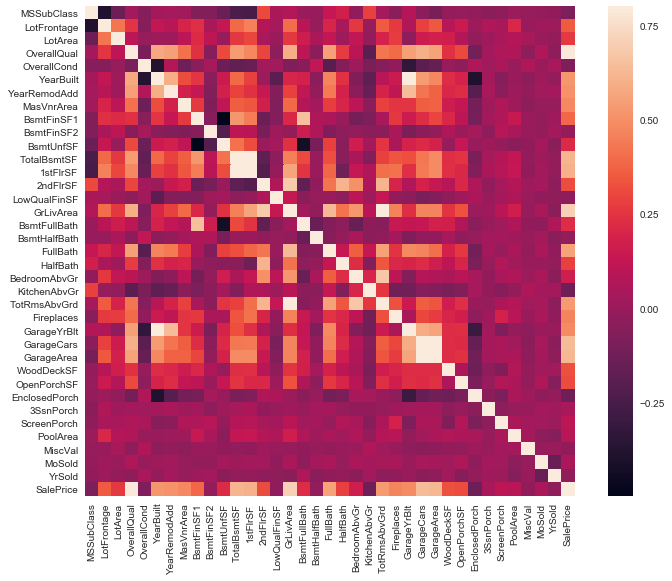

In [89]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

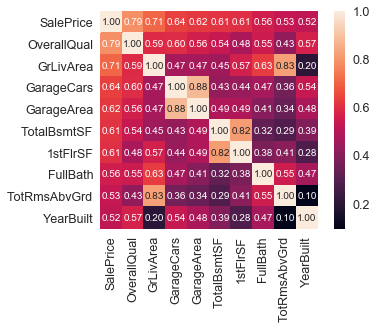

In [93]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


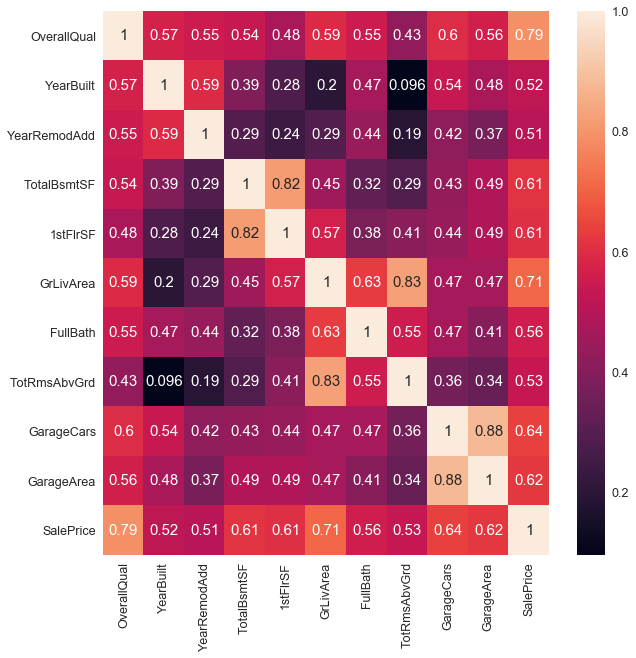

In [71]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True)
print(top_corr_features)

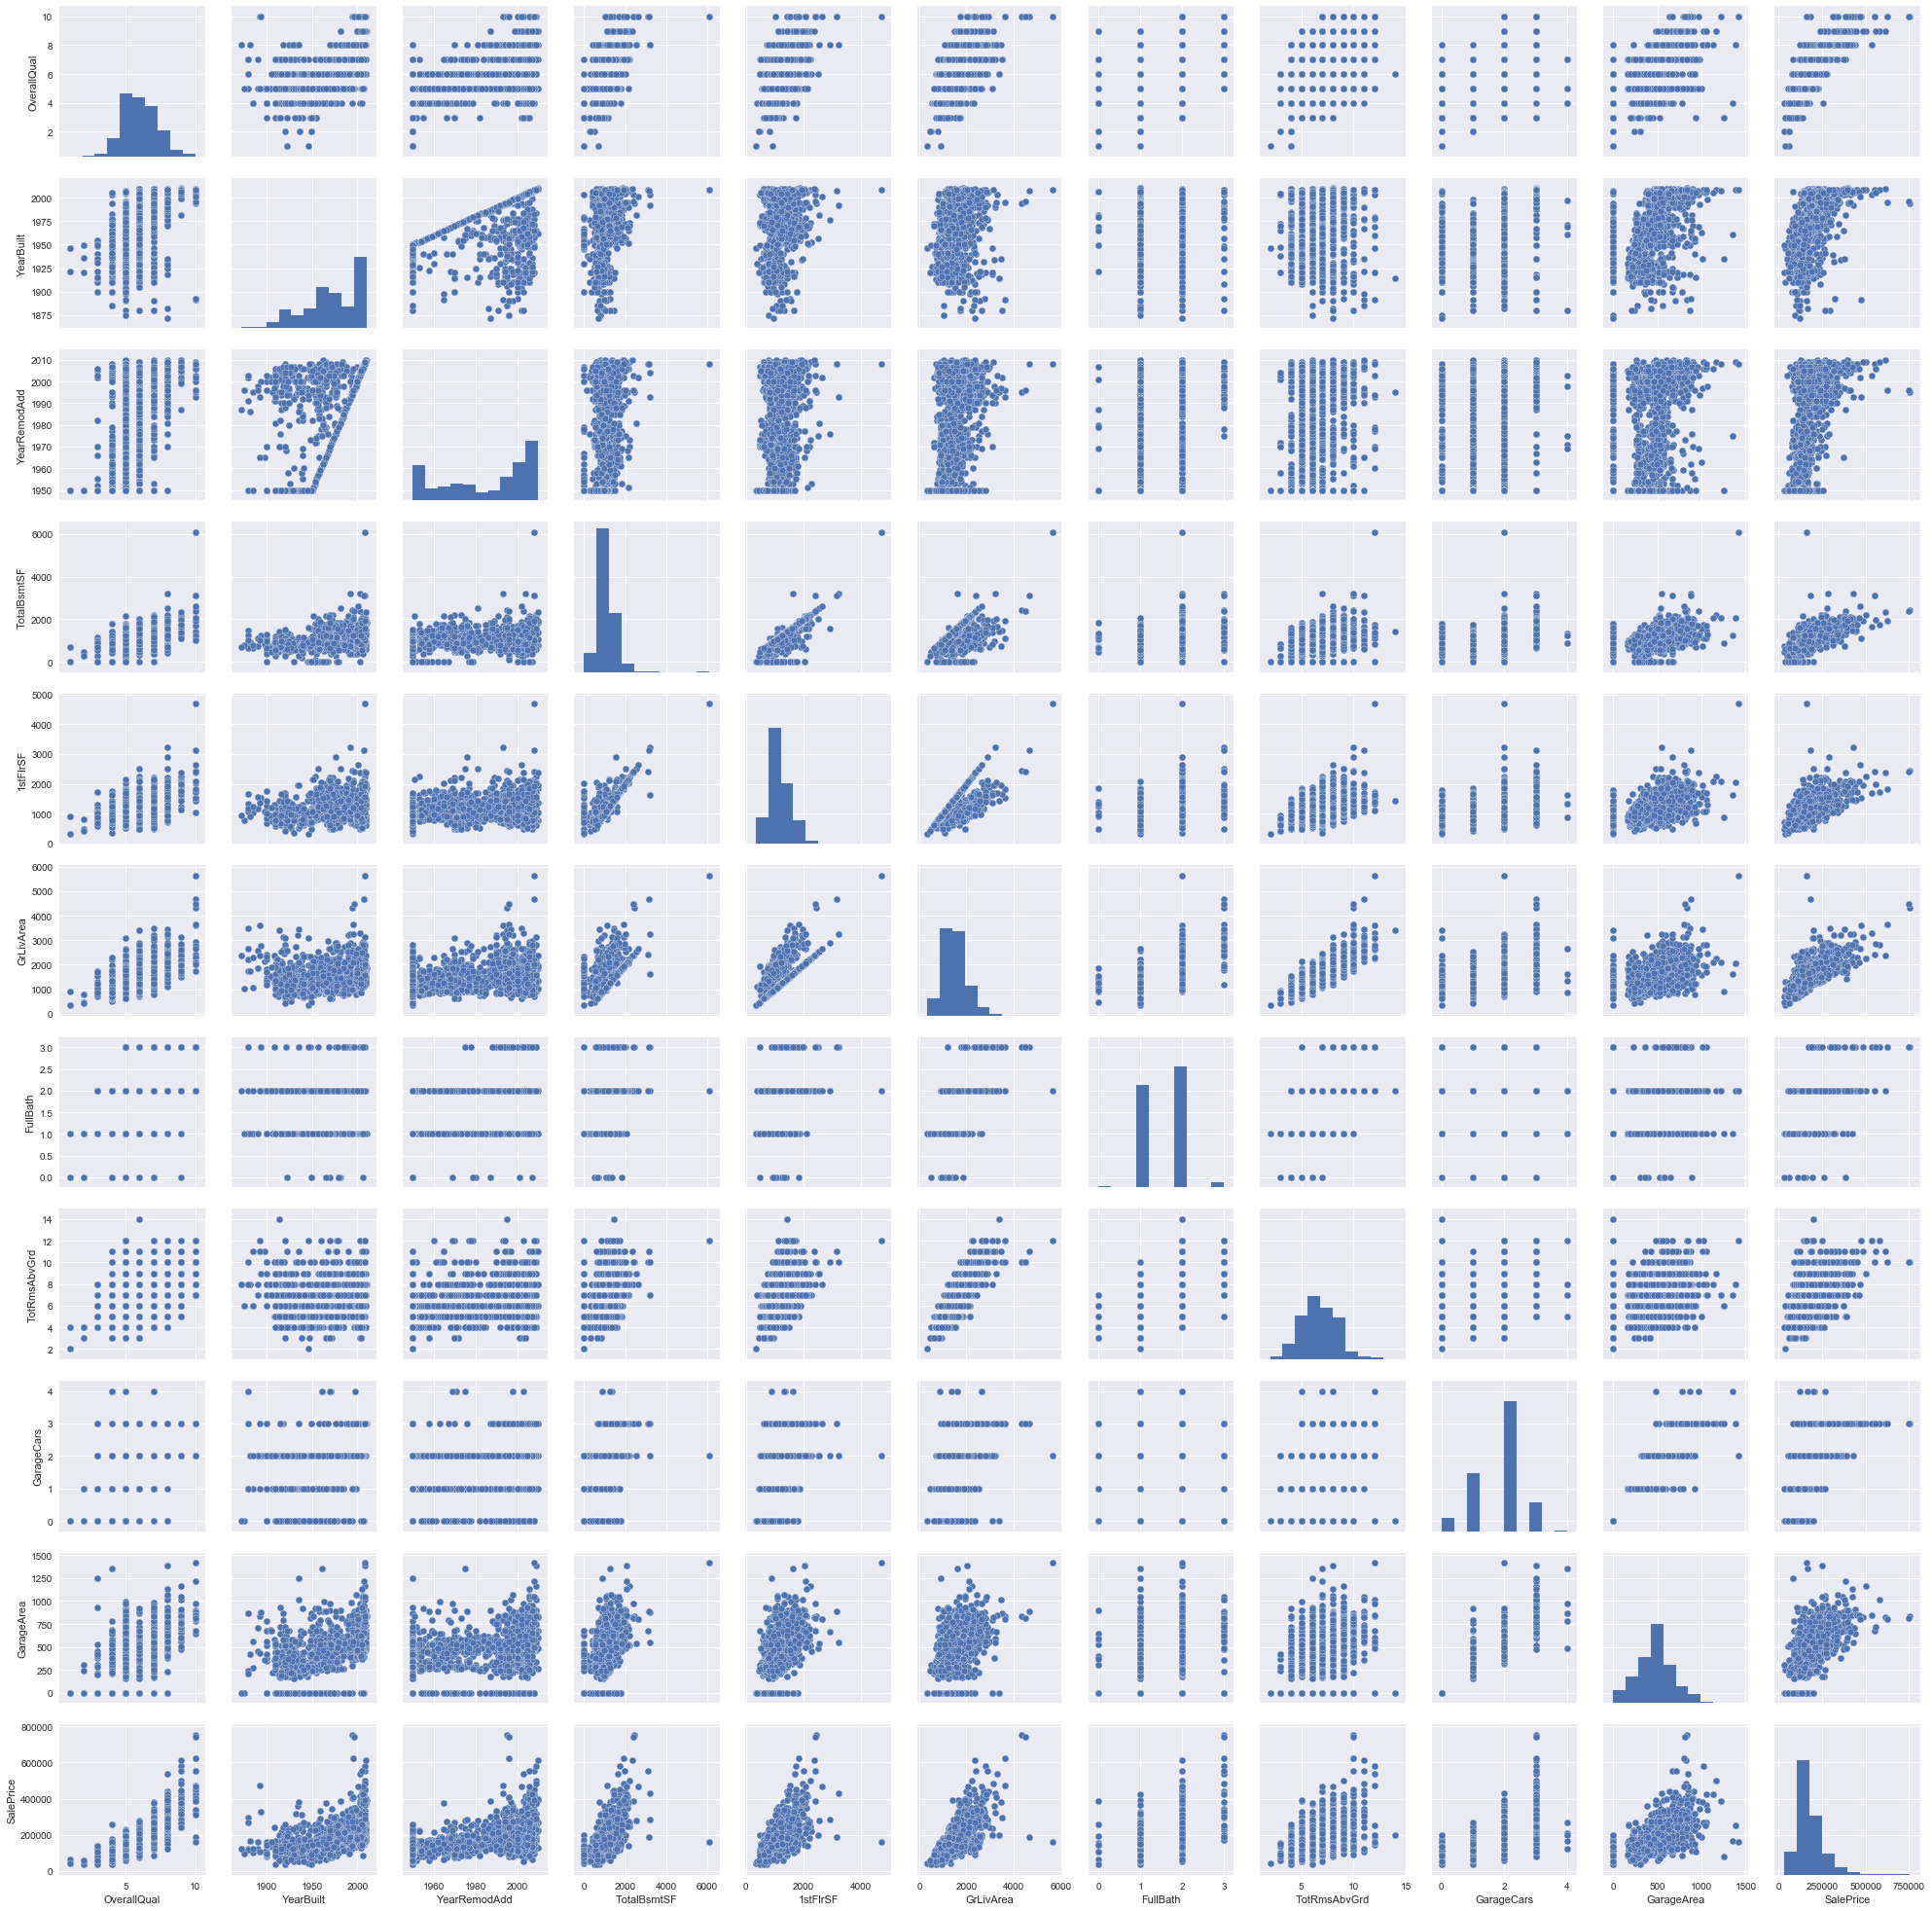

In [95]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
sns.pairplot(train_df[top_corr_features], size = 2.5)
plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


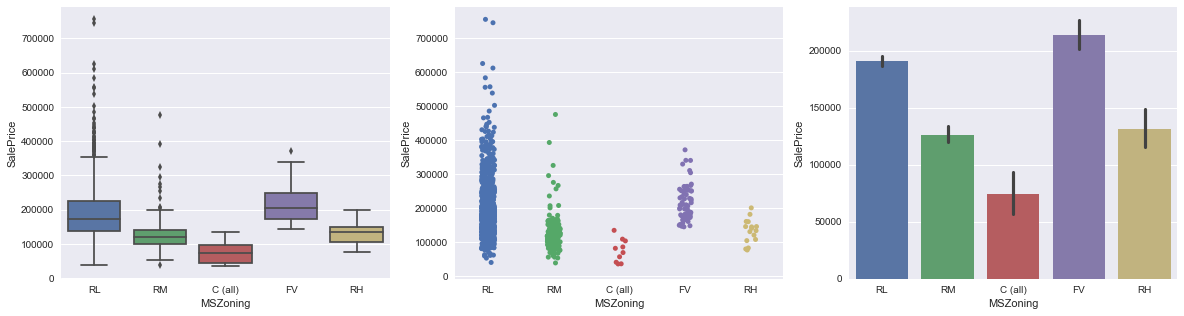

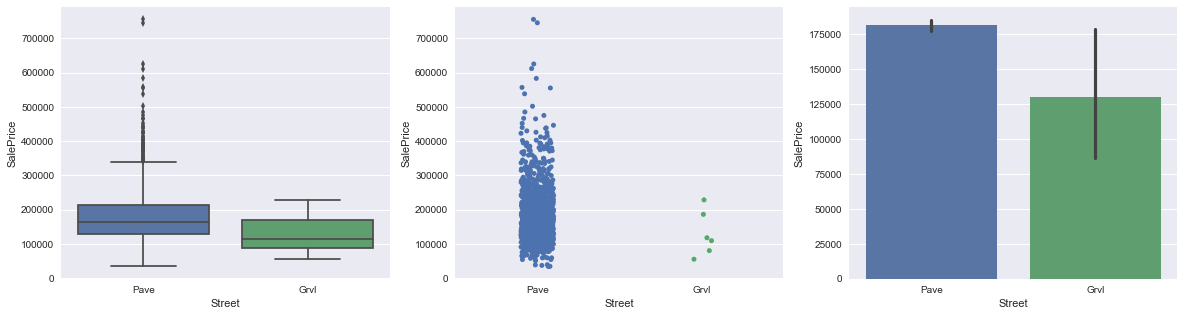

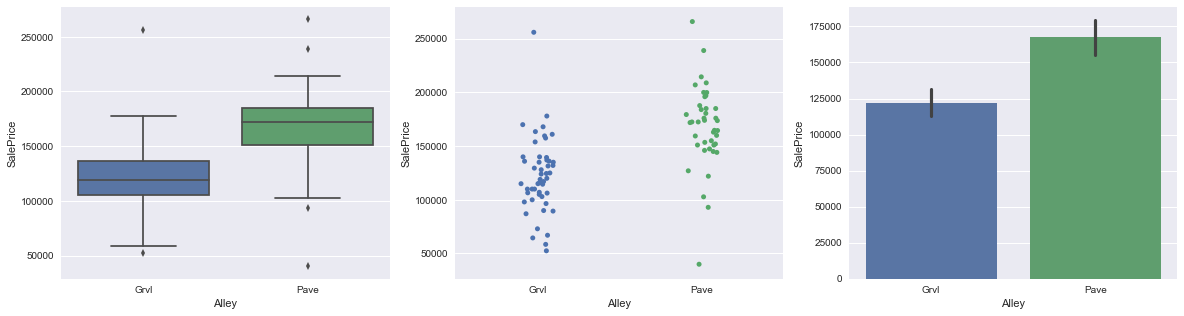

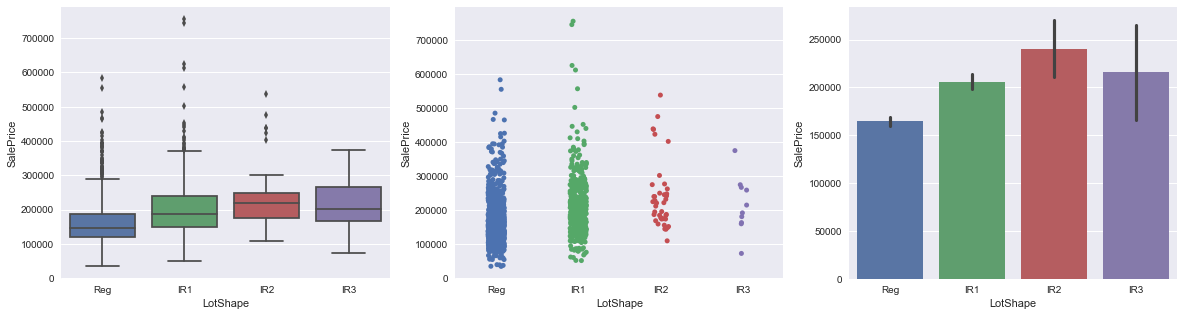

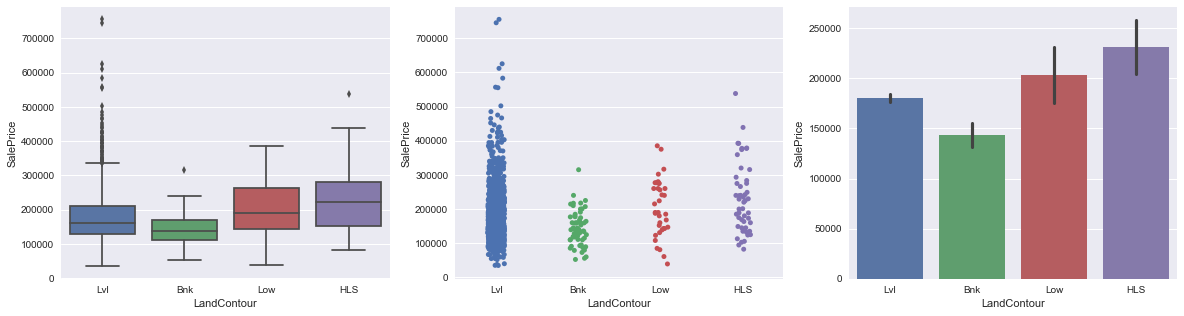

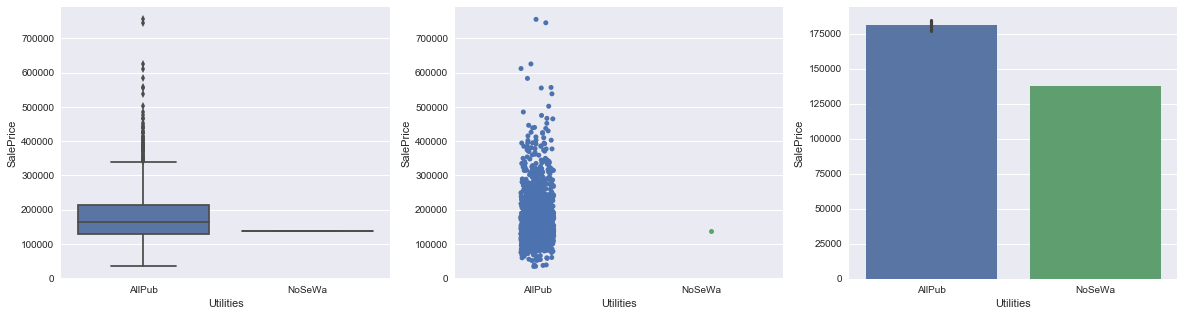

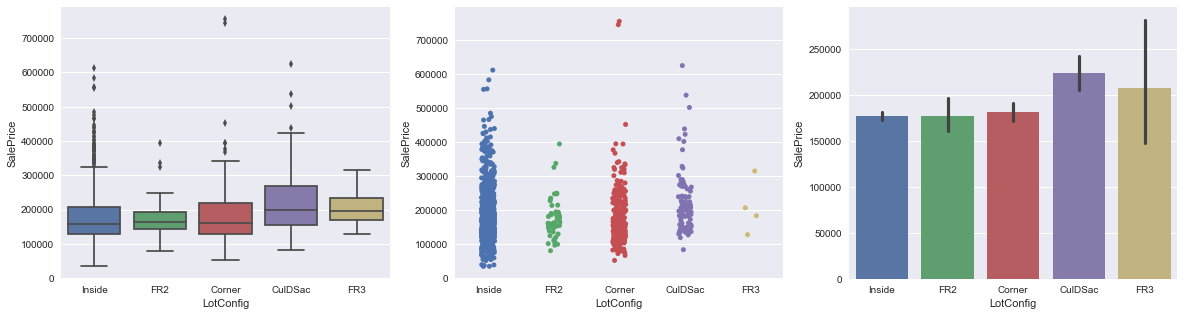

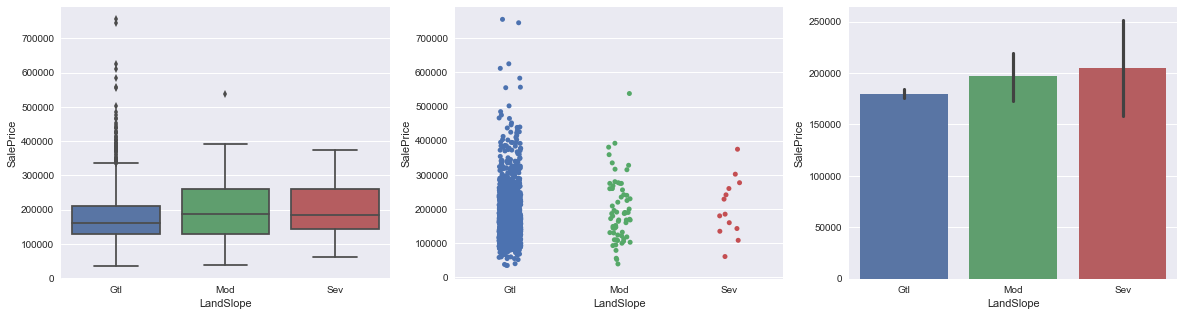

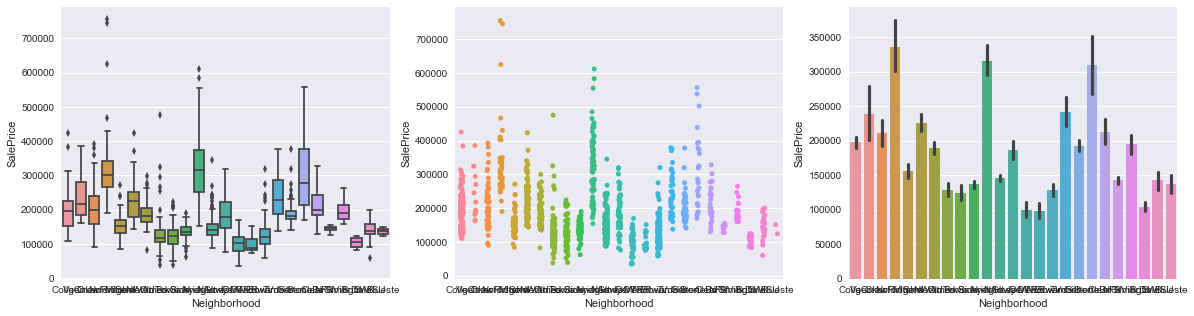

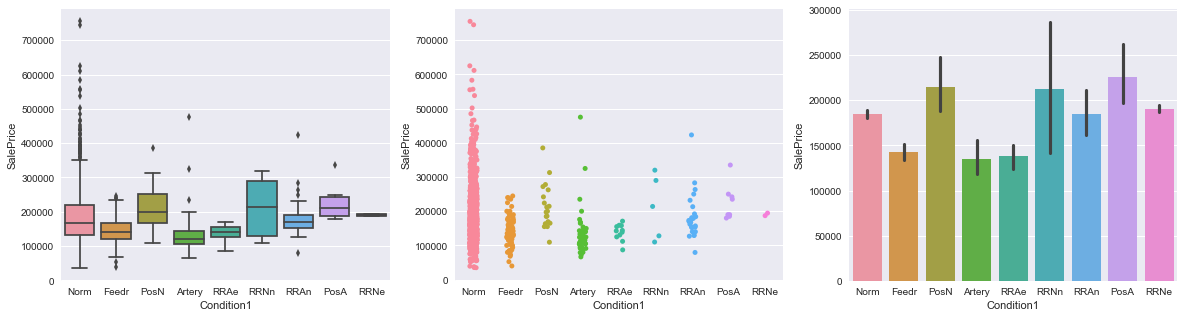

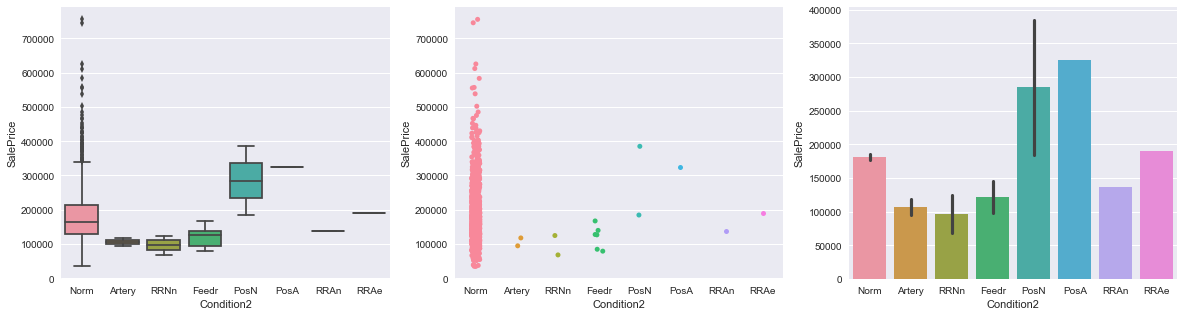

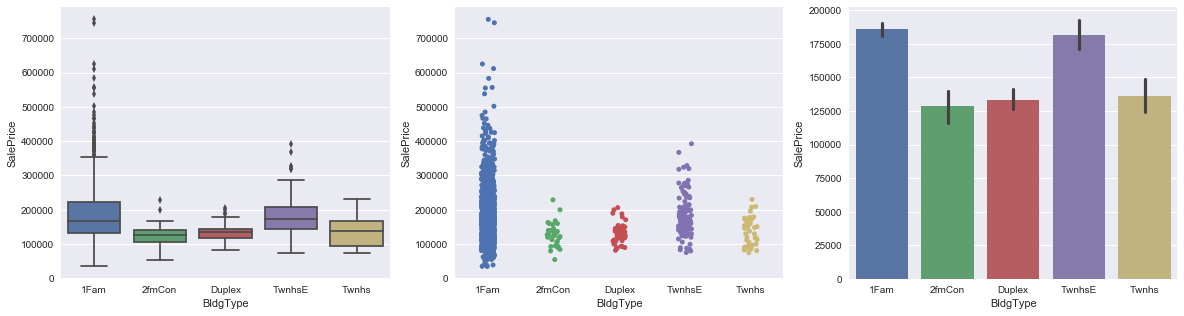

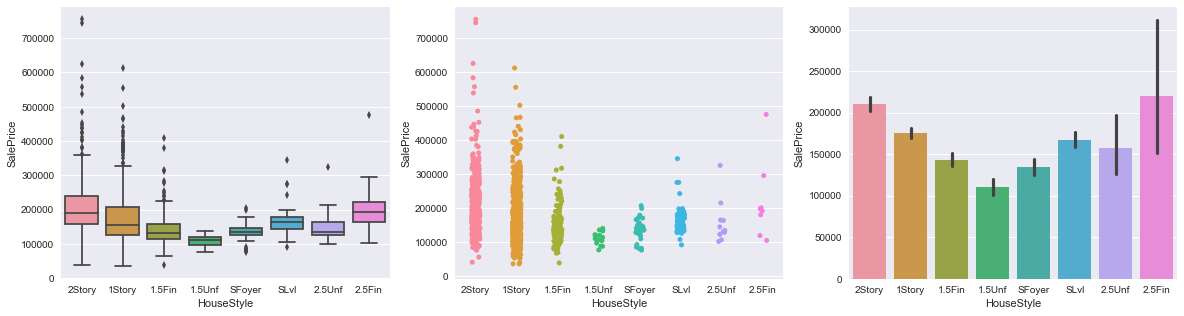

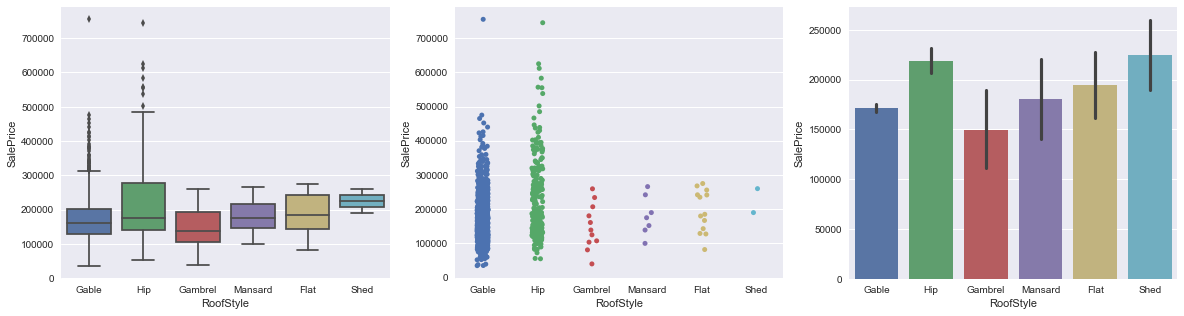

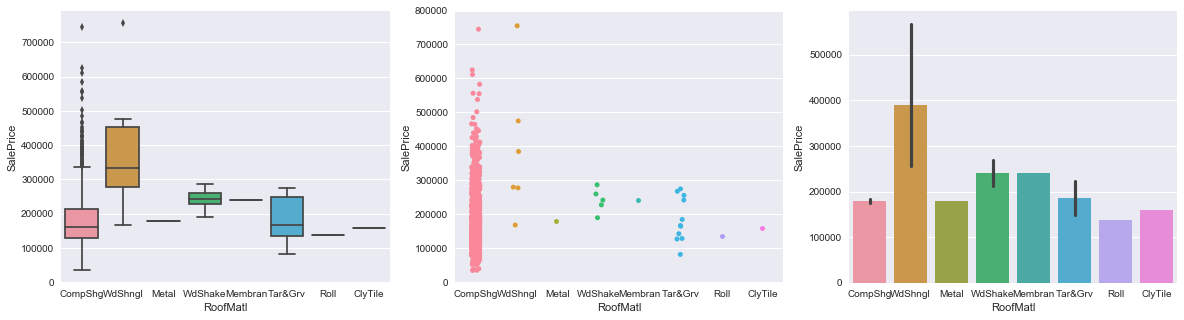

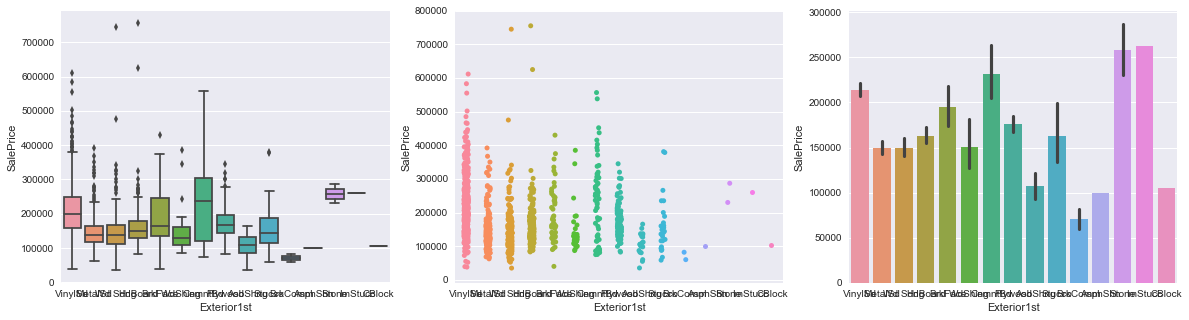

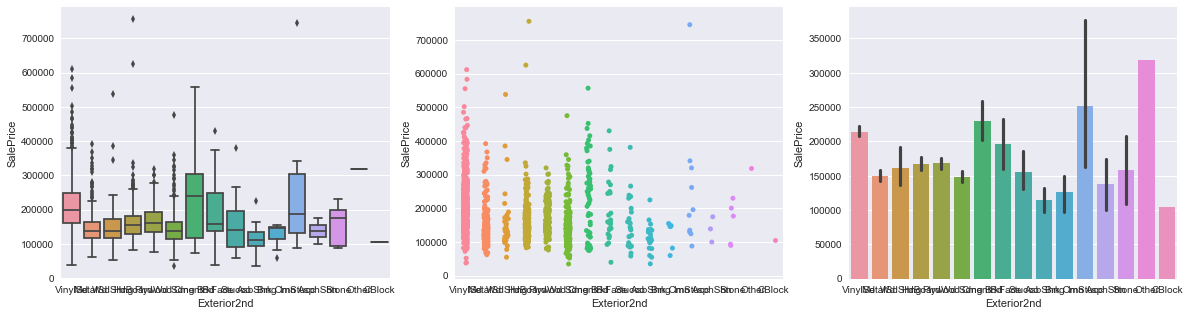

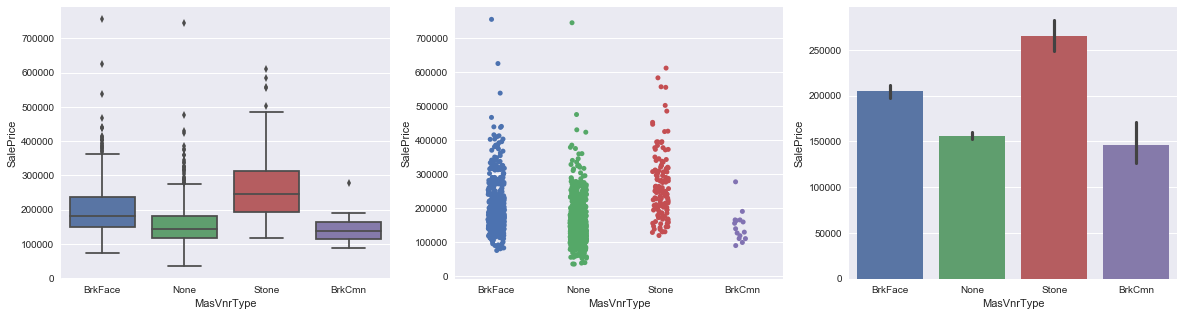

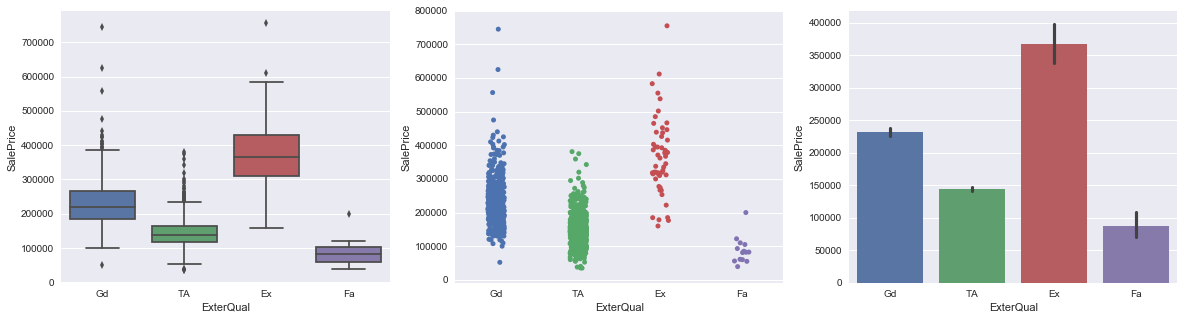

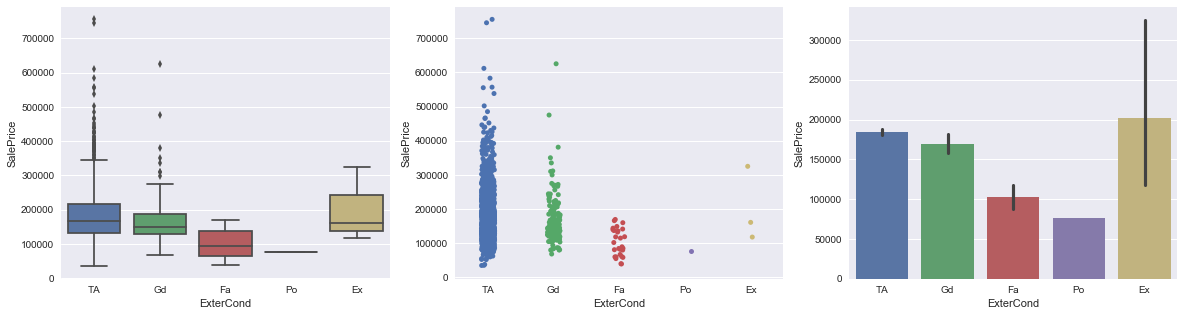

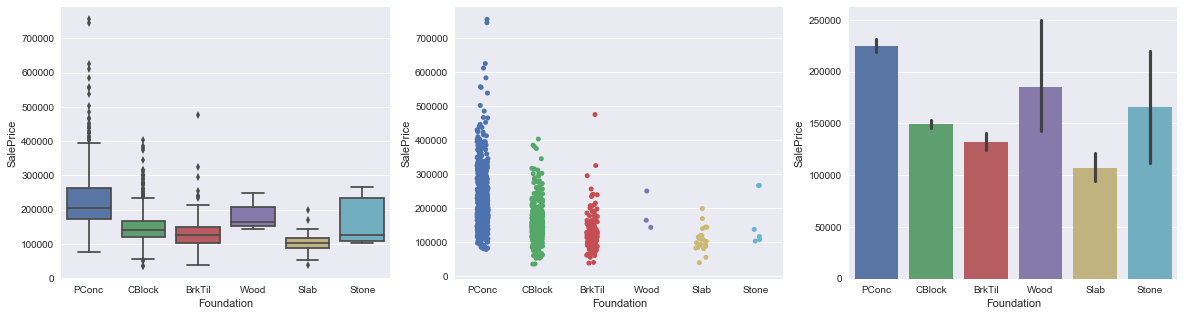

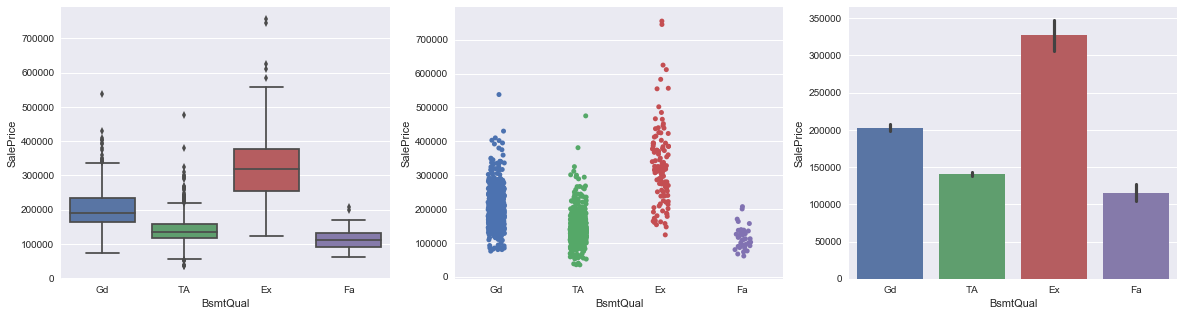

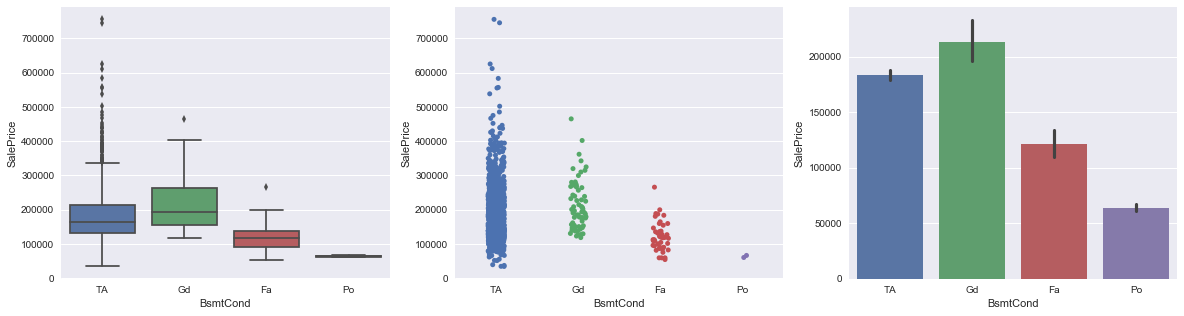

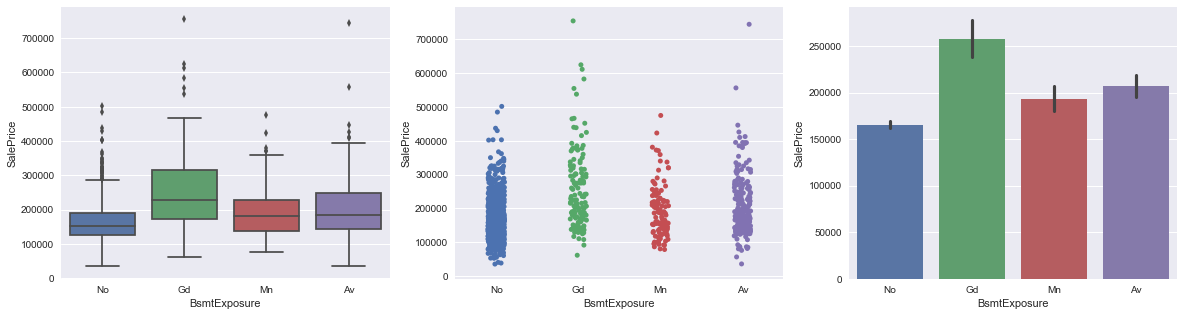

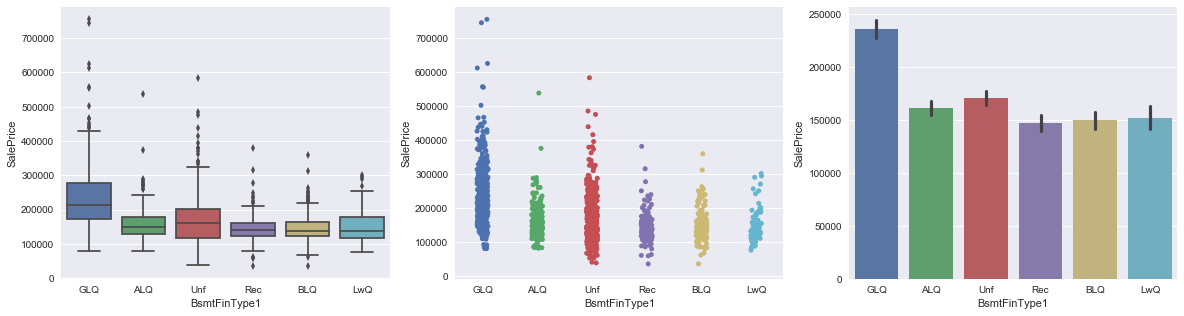

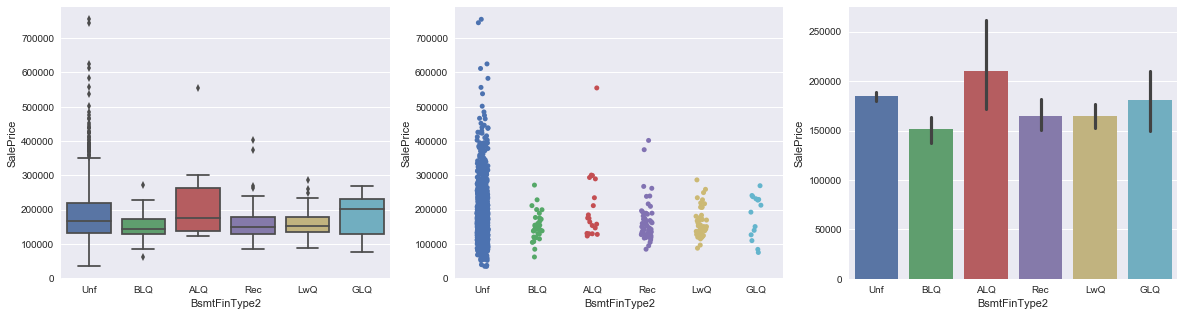

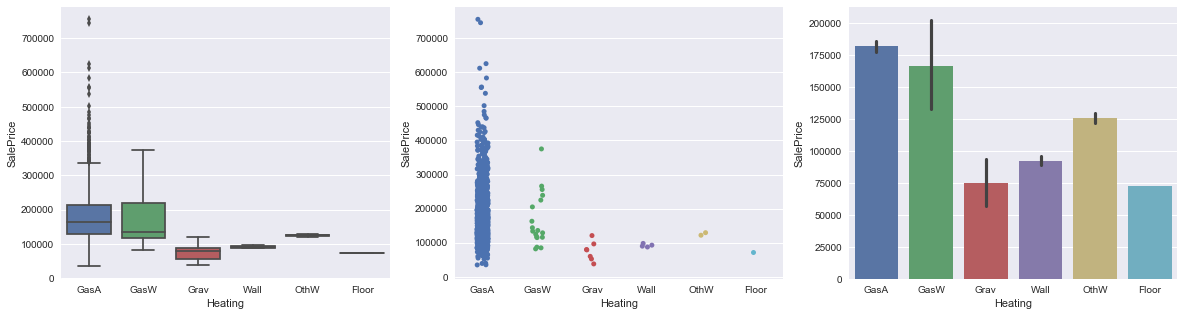

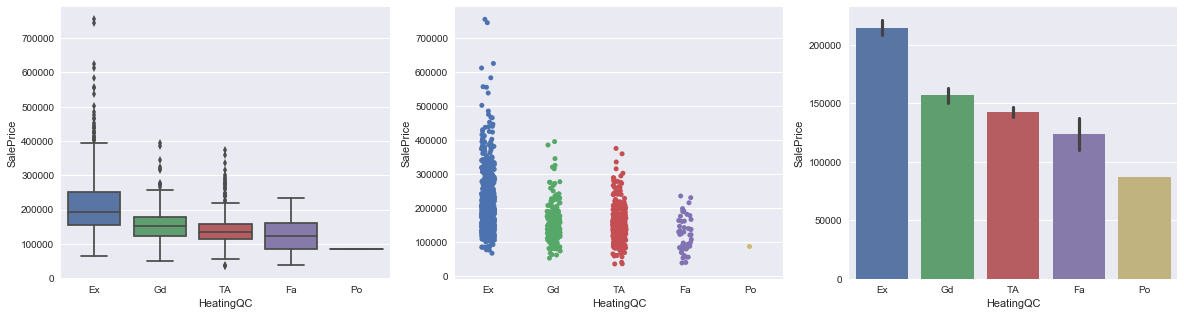

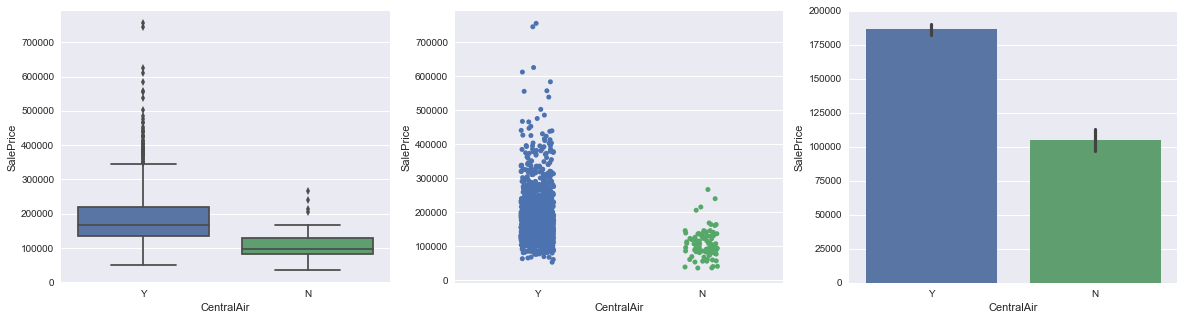

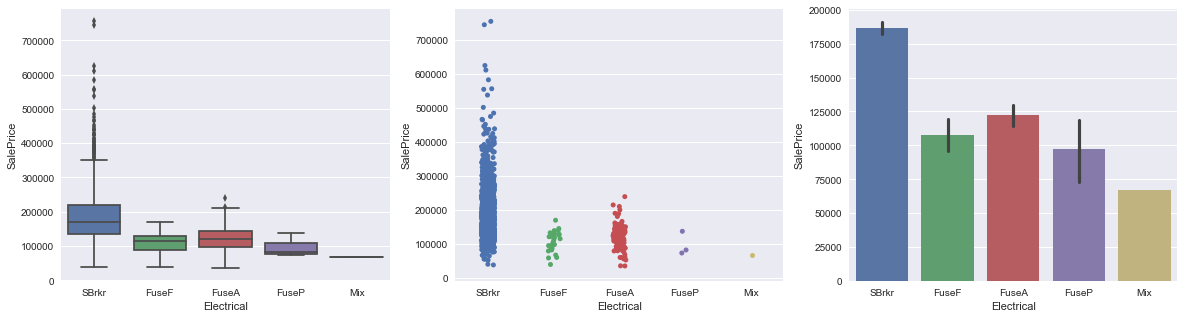

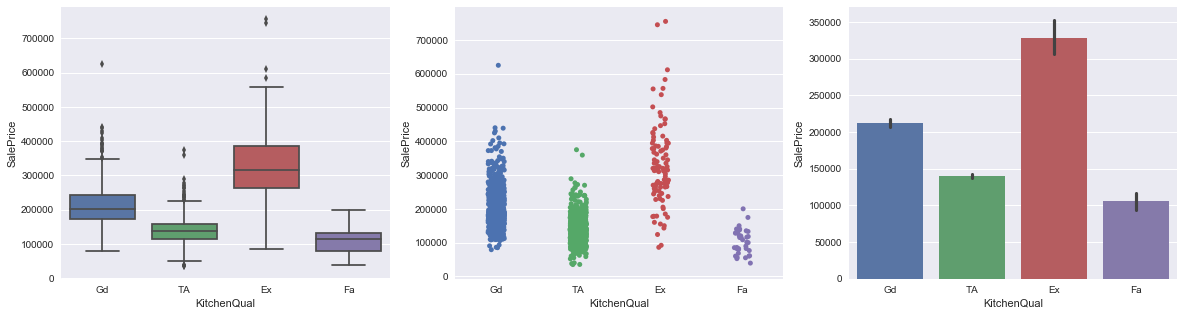

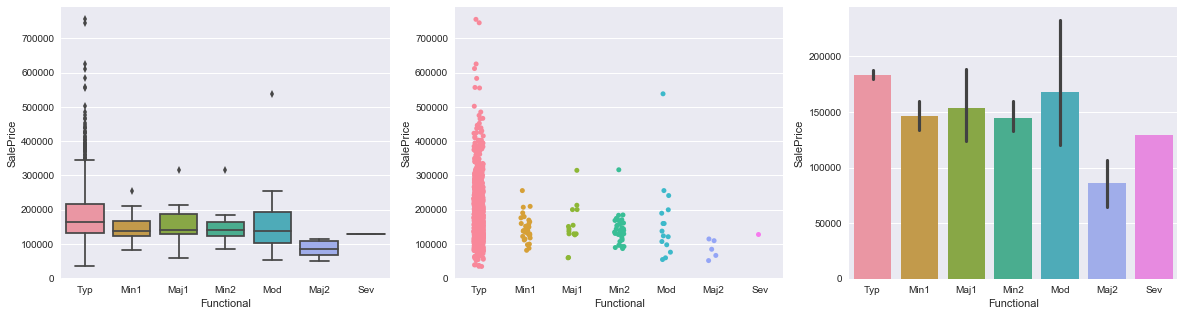

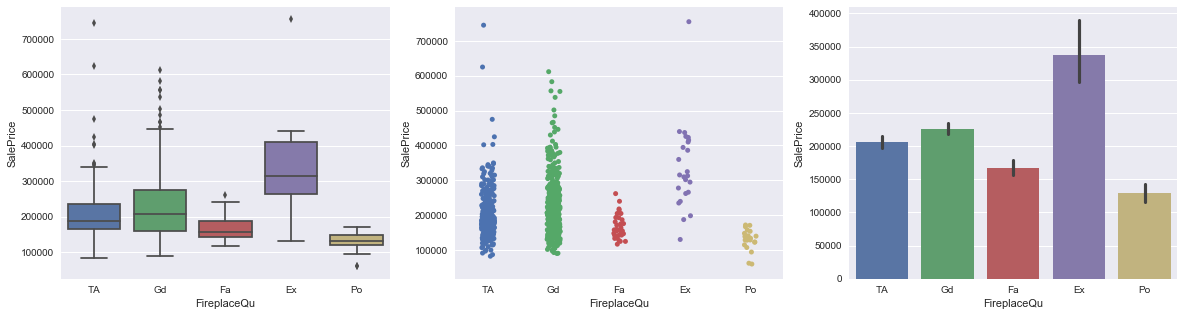

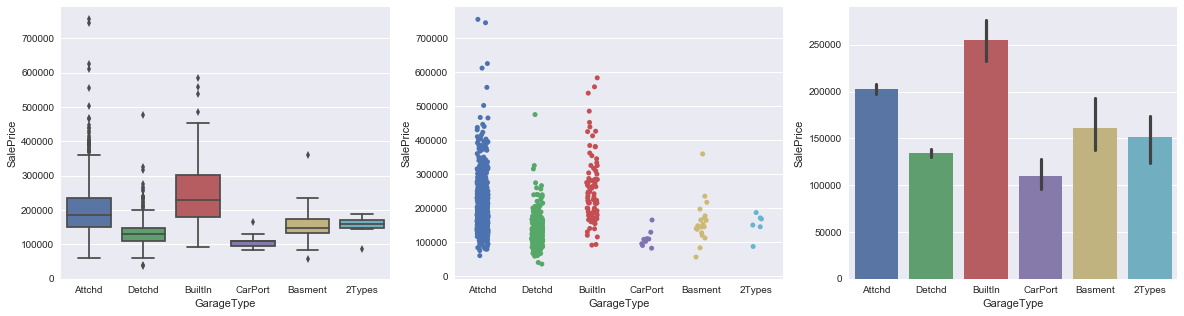

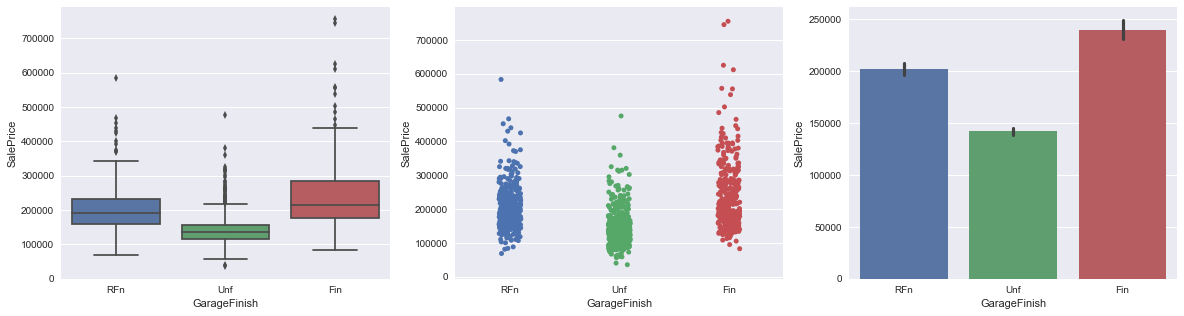

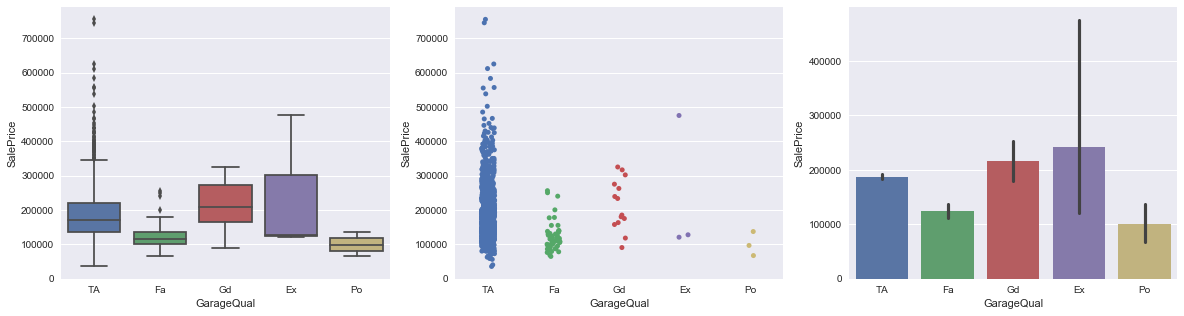

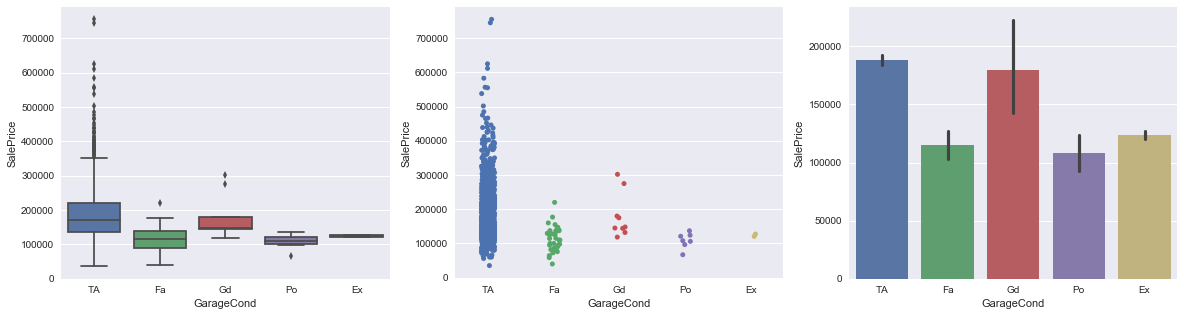

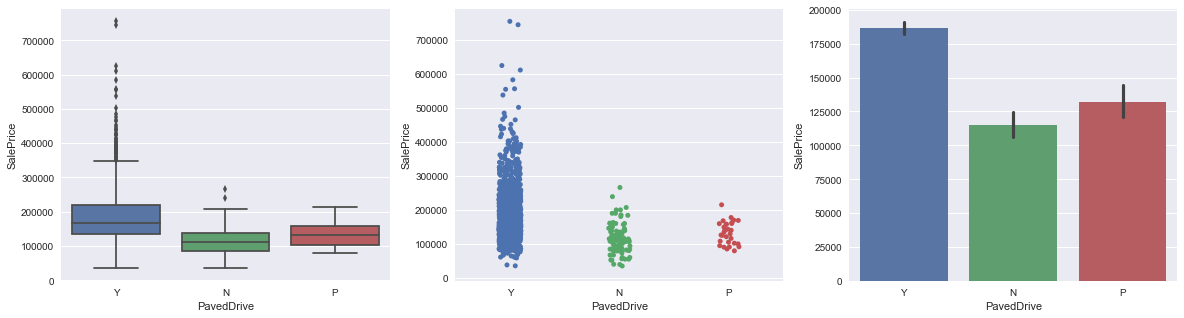

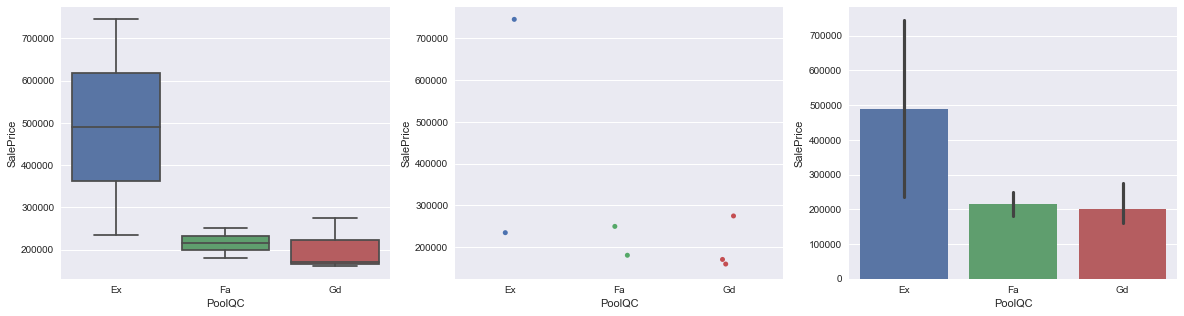

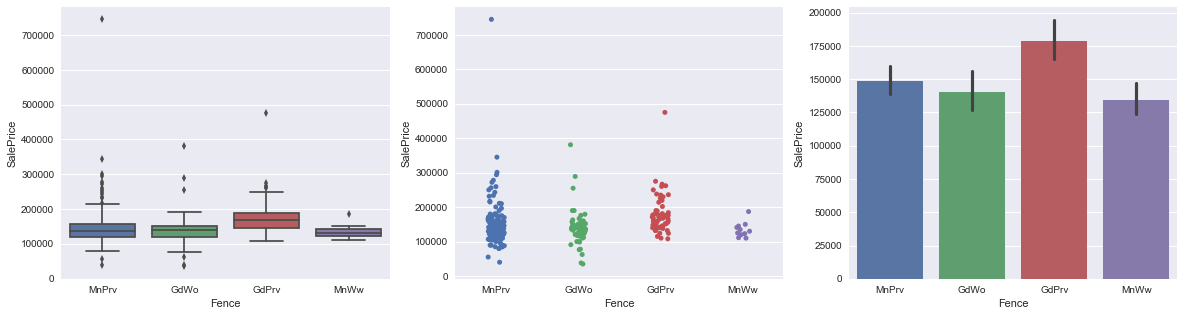

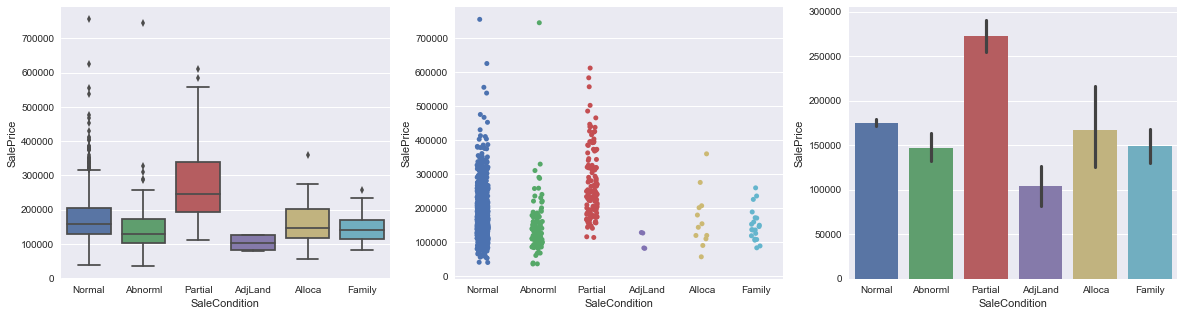

In [90]:
for col in categorial_col:
    plt.subplots(figsize =(20, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=col, y="SalePrice", data=train_df);
    plt.subplot(1, 3, 2)
    sns.stripplot(x=col, y="SalePrice", data=train_df, size = 5, jitter = True);
    plt.subplot(1, 3, 3)
    sns.barplot(x=col, y="SalePrice", data=train_df);

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


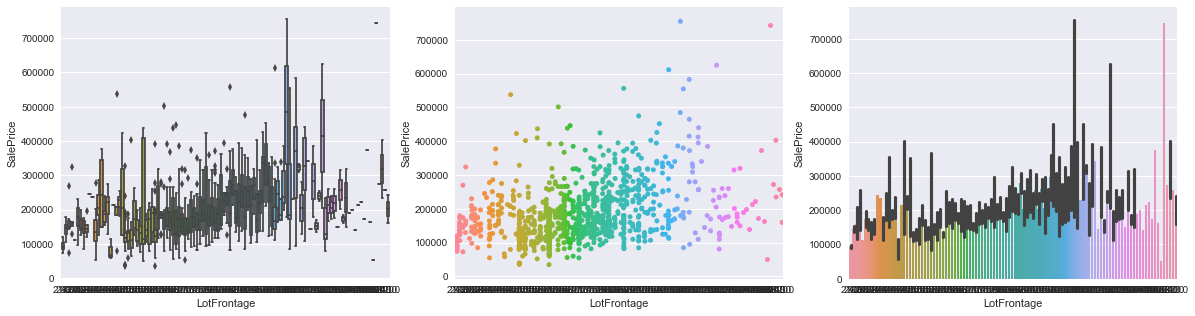

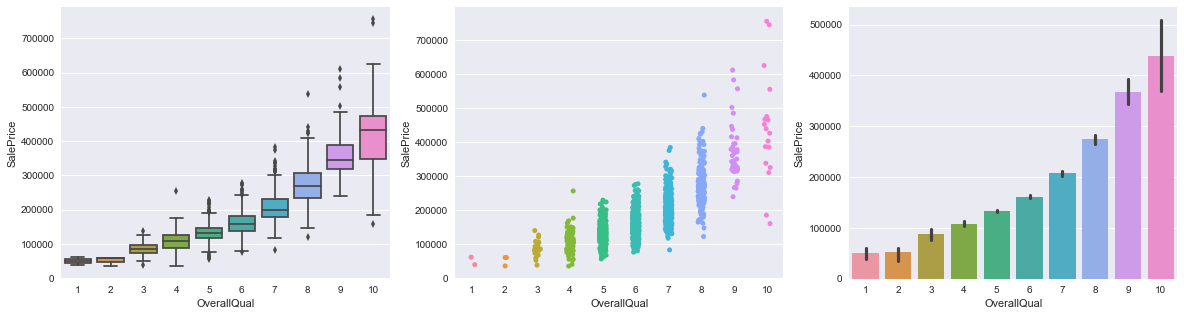

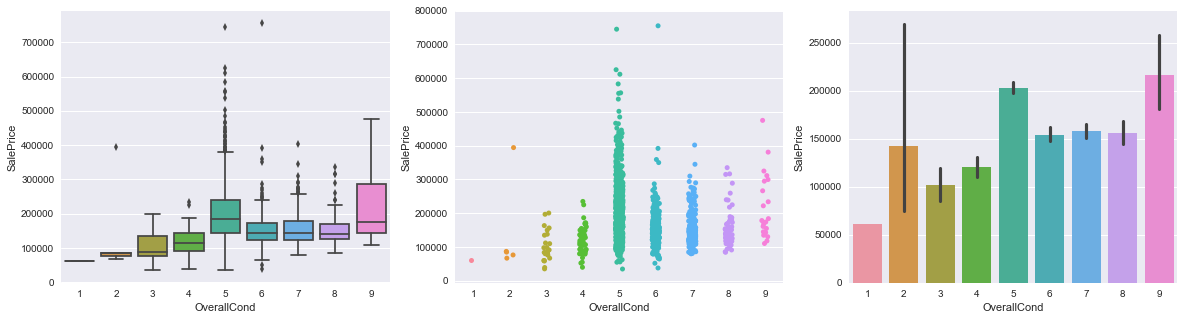

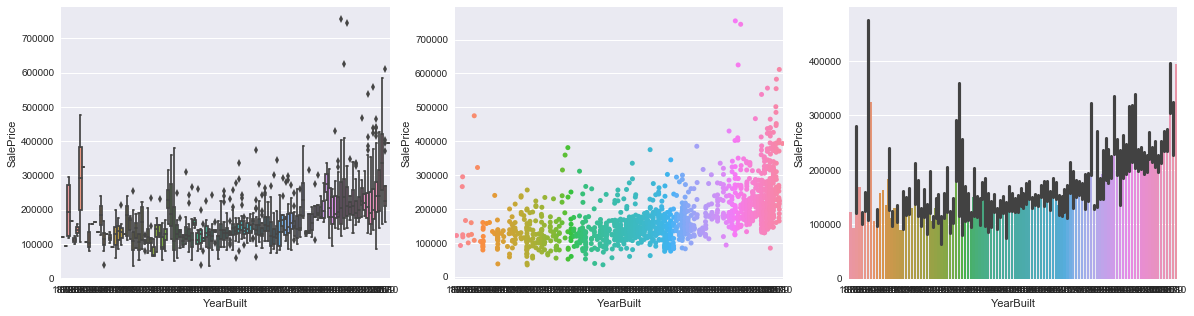

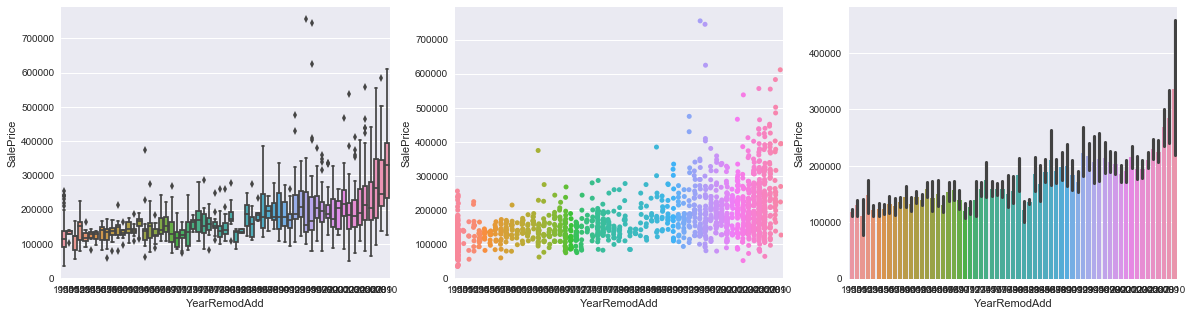

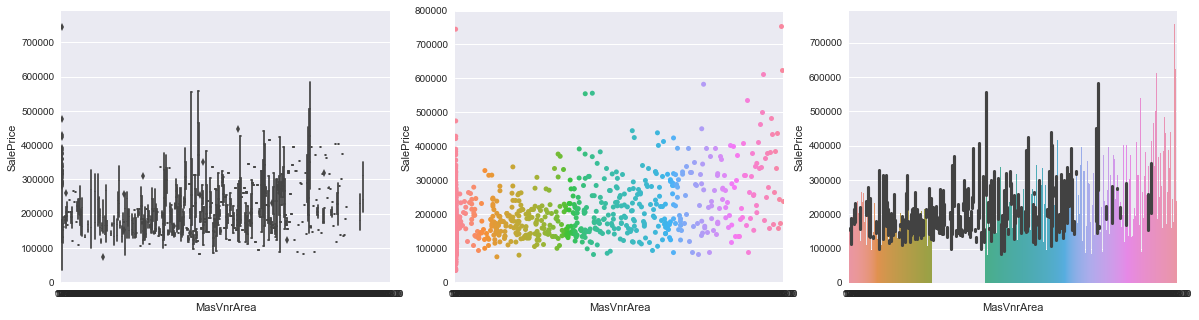

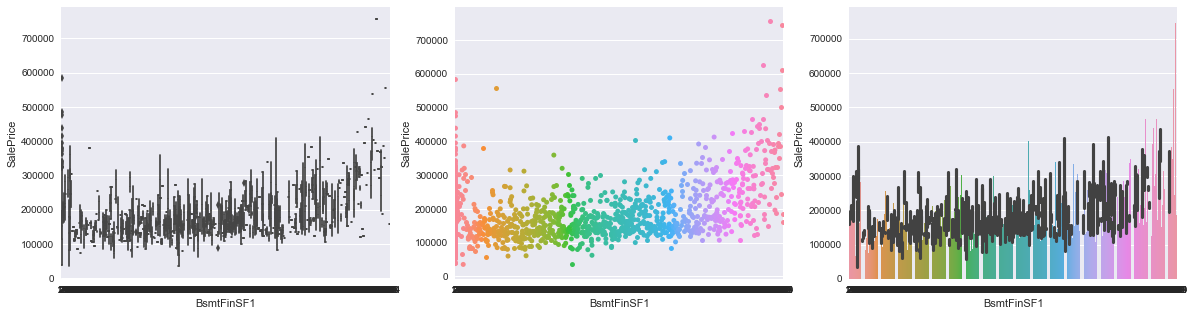

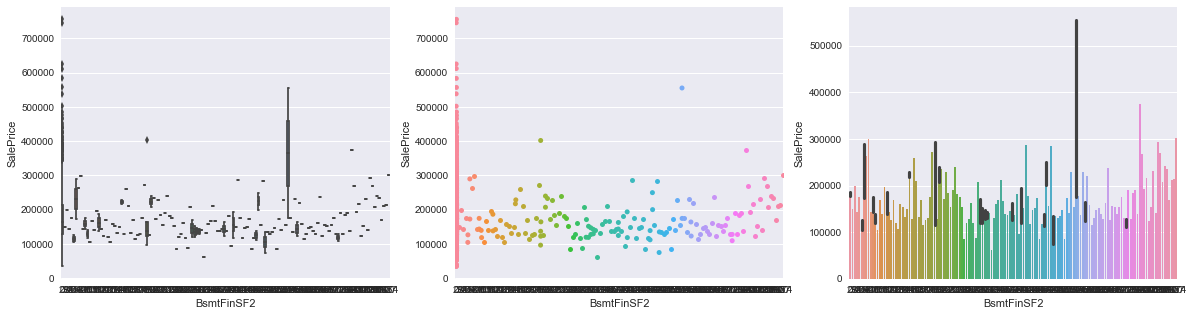

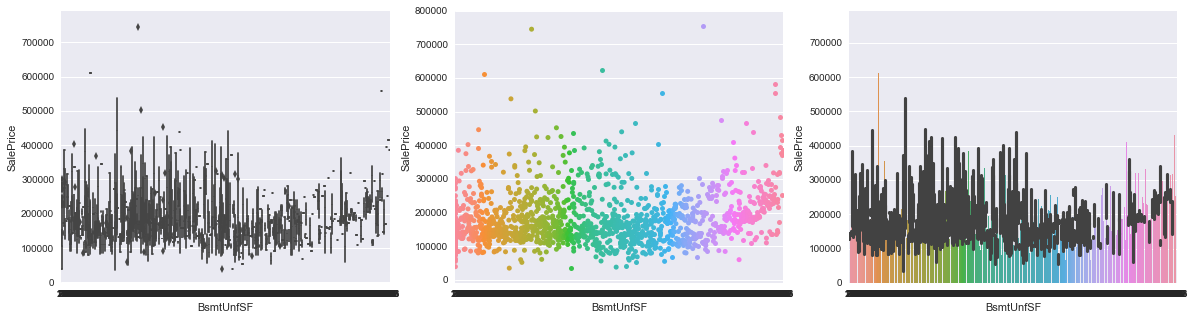

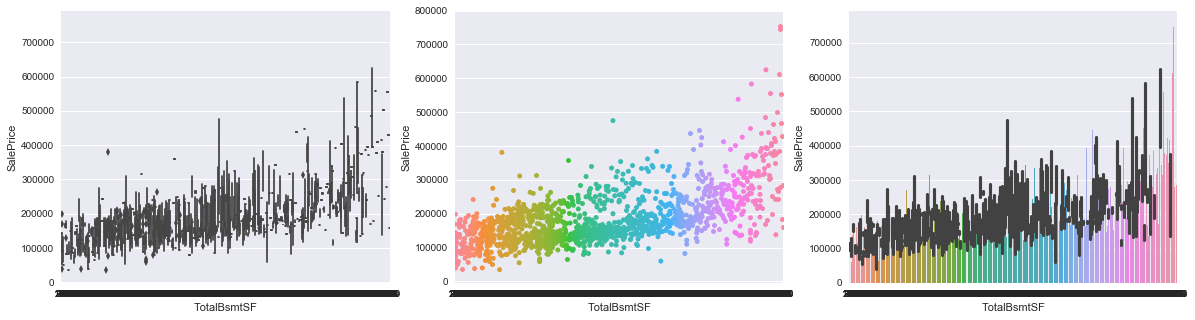

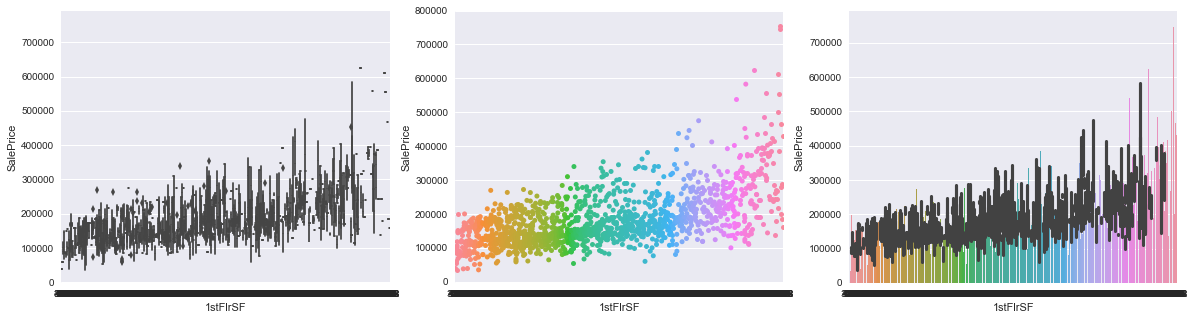

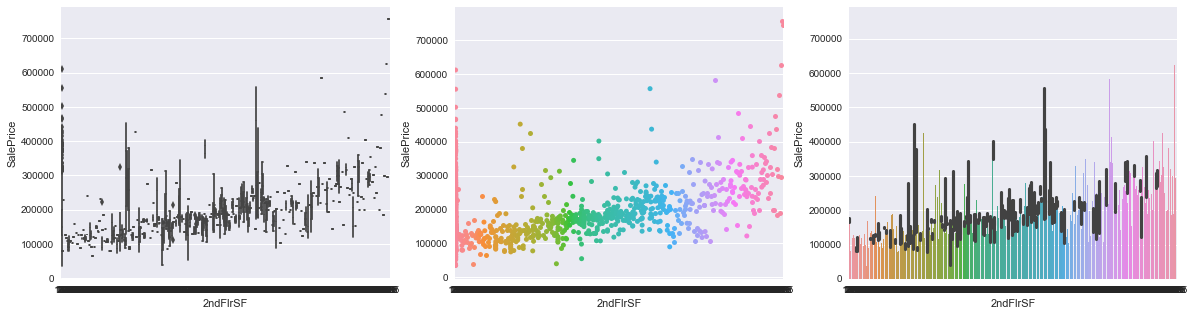

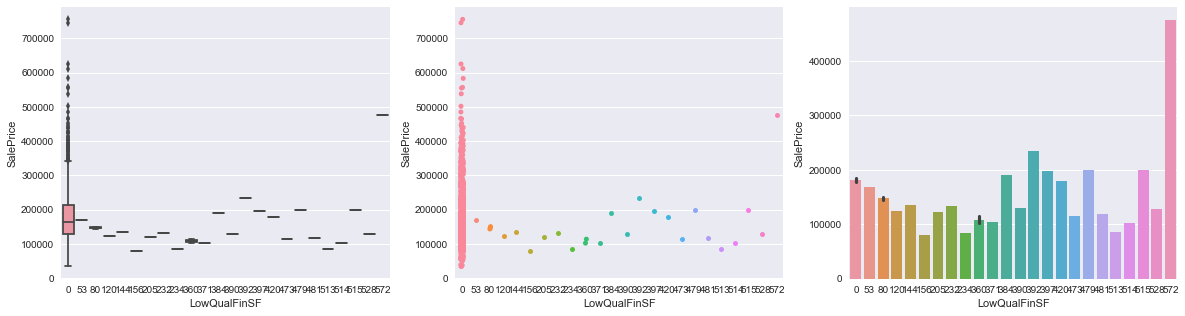

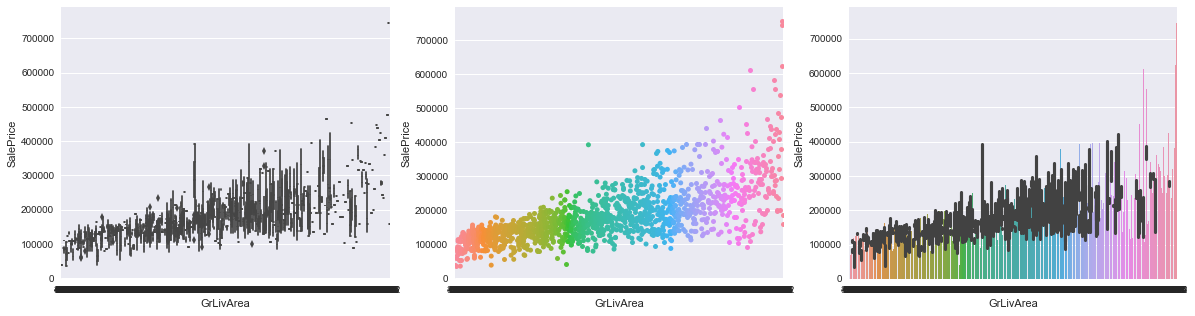

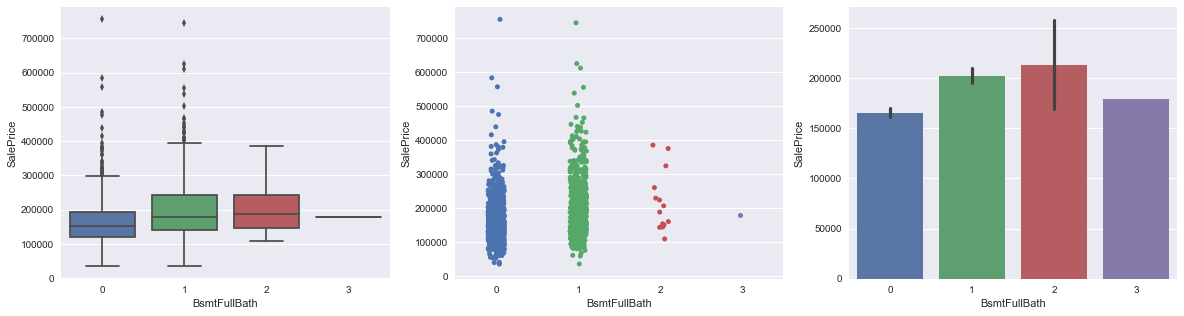

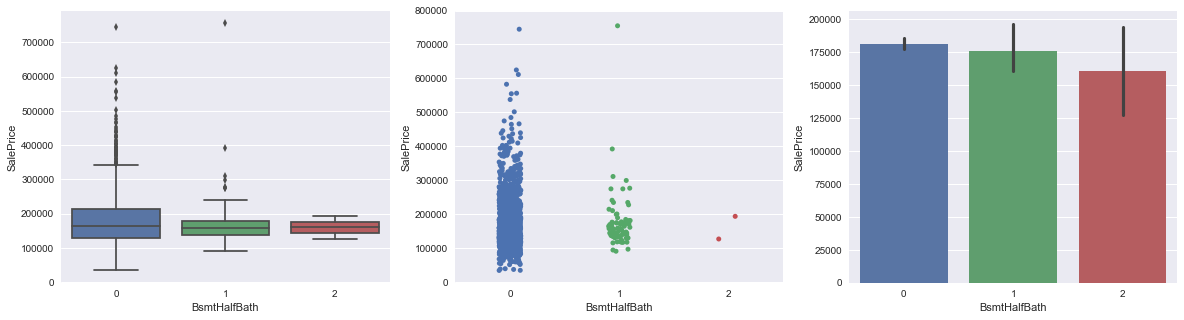

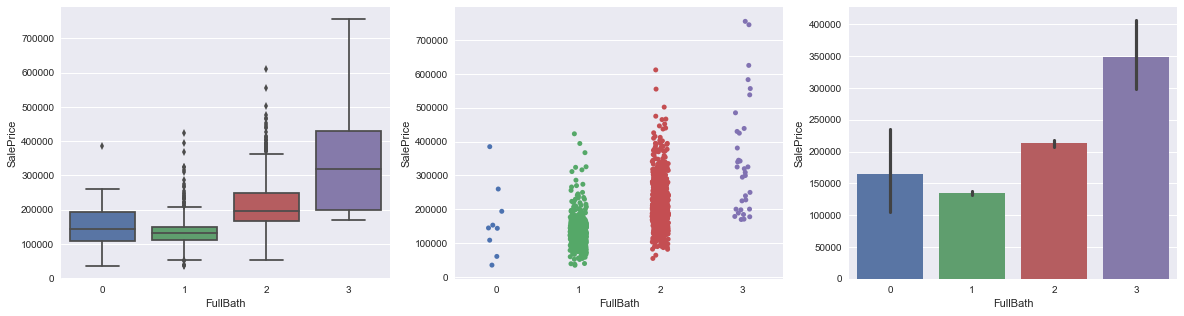

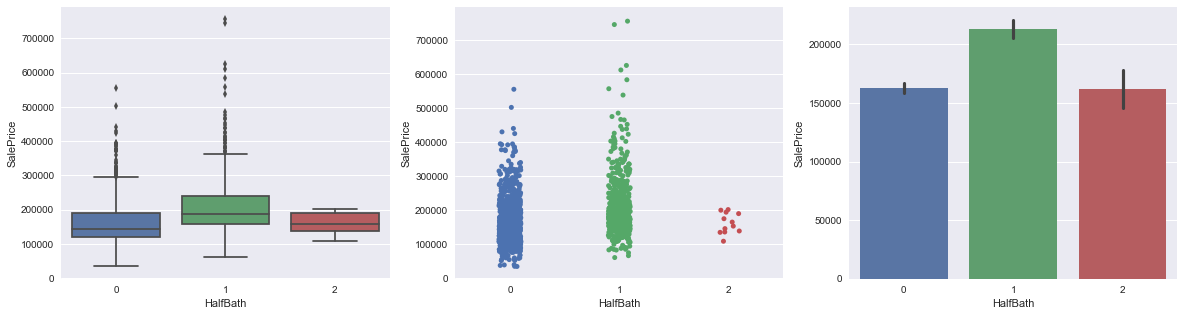

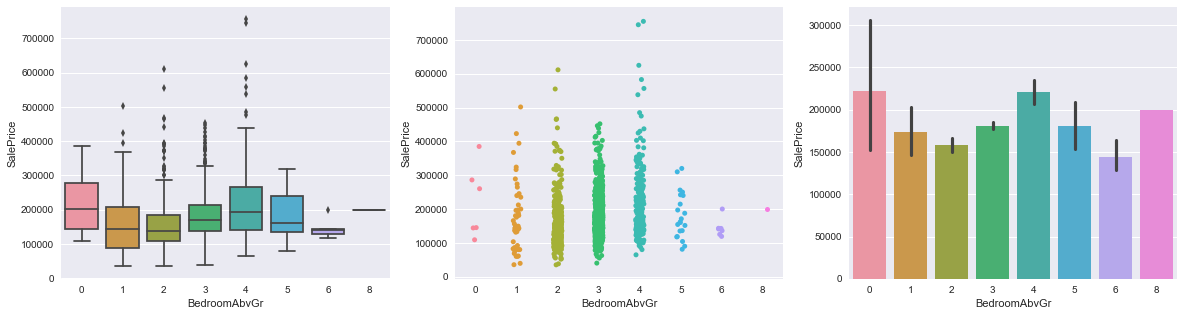

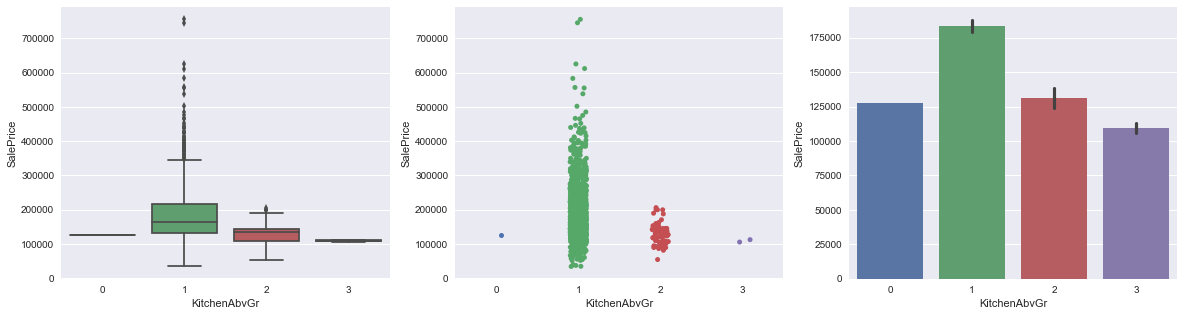

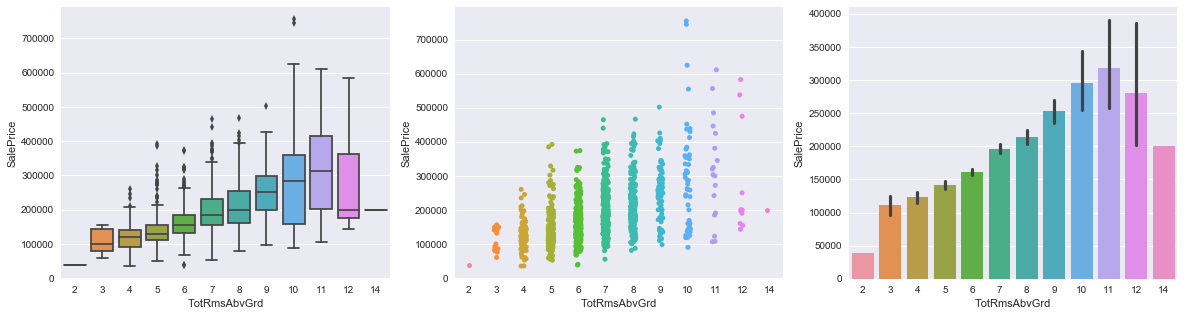

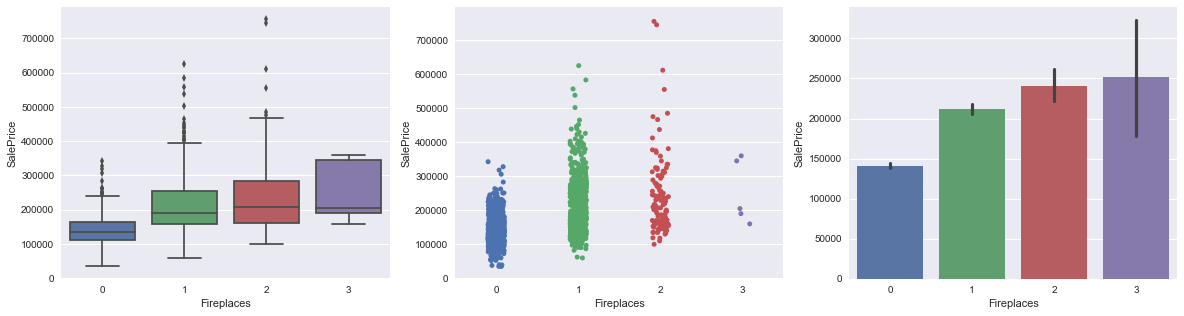

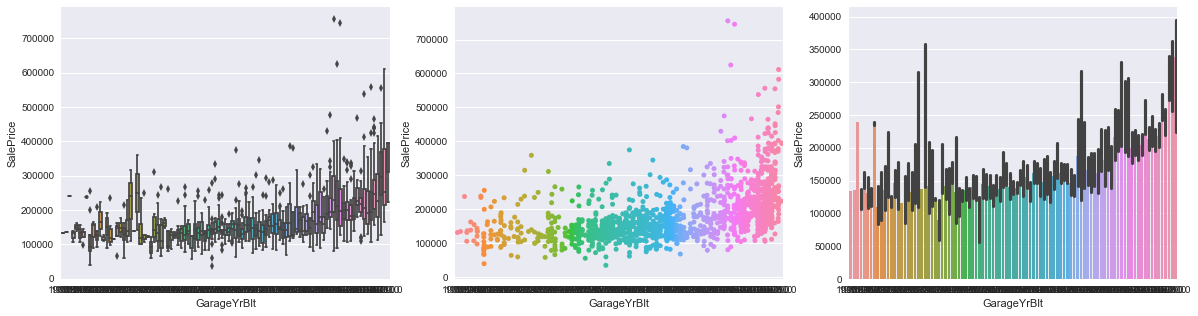

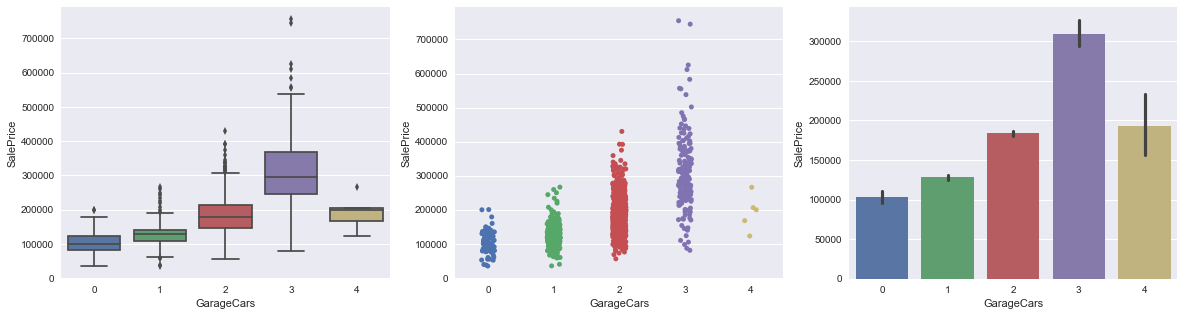

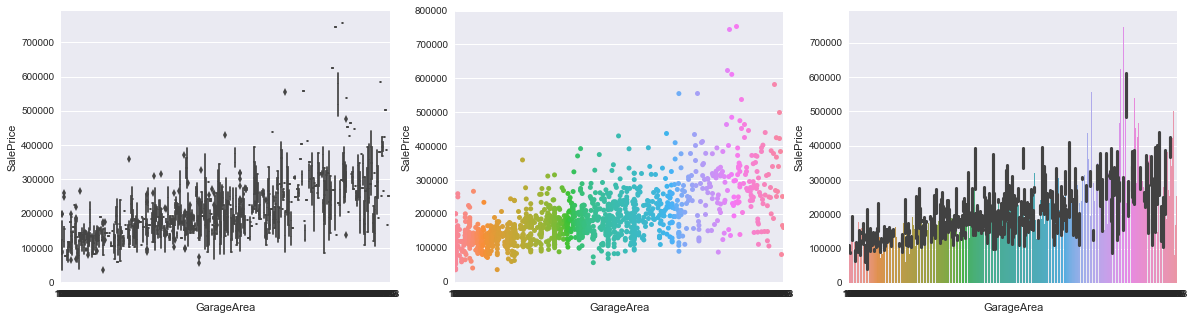

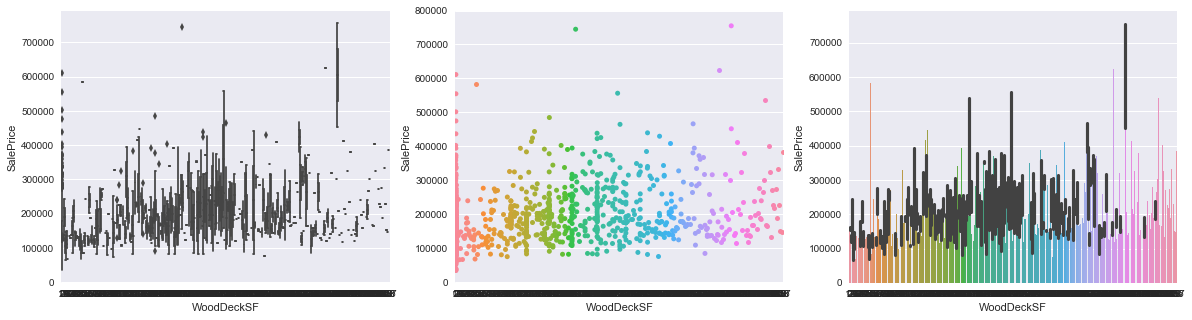

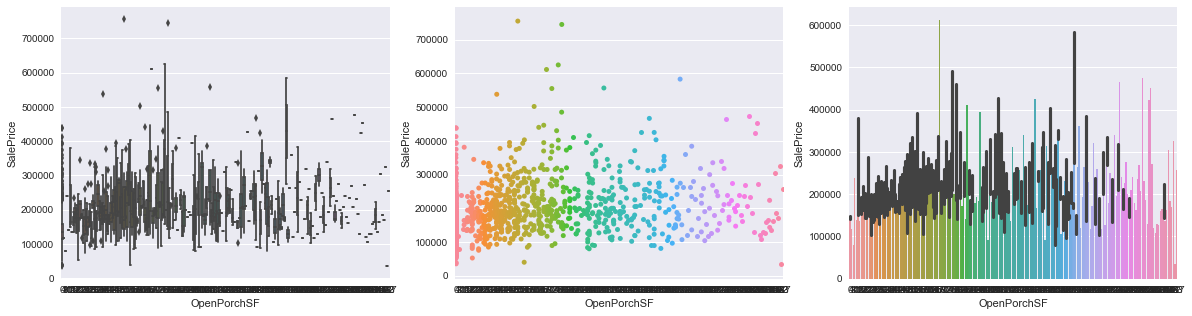

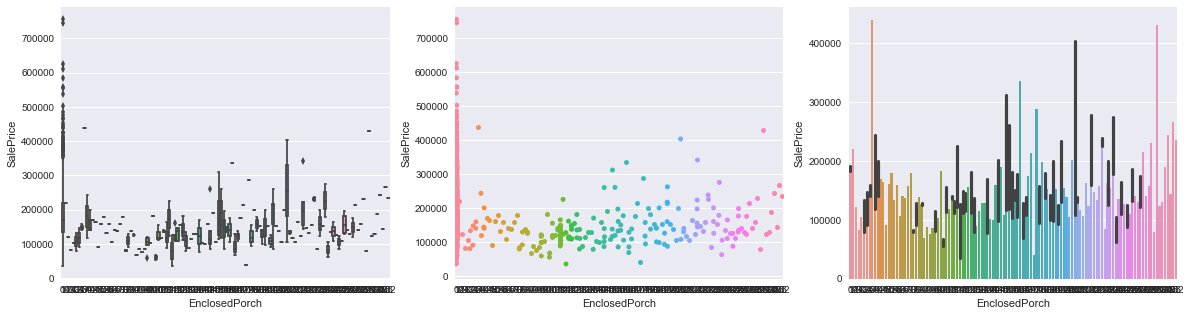

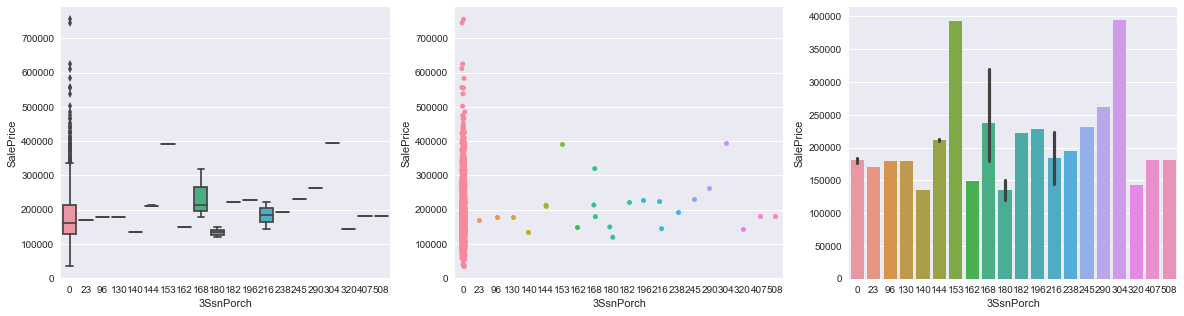

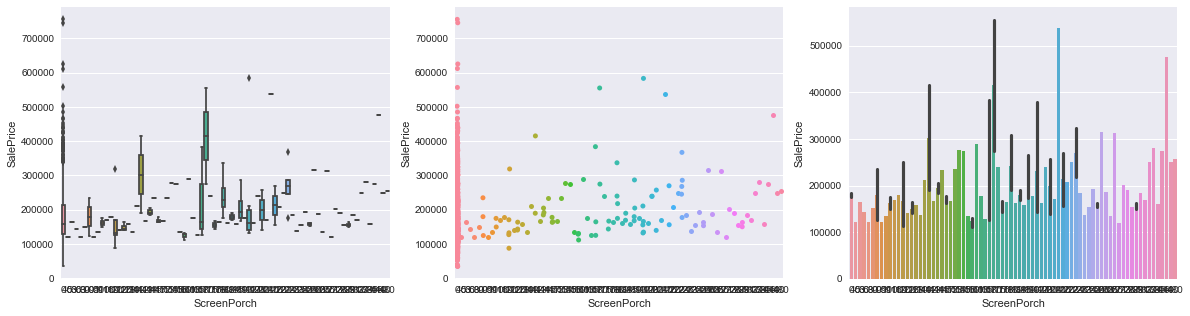

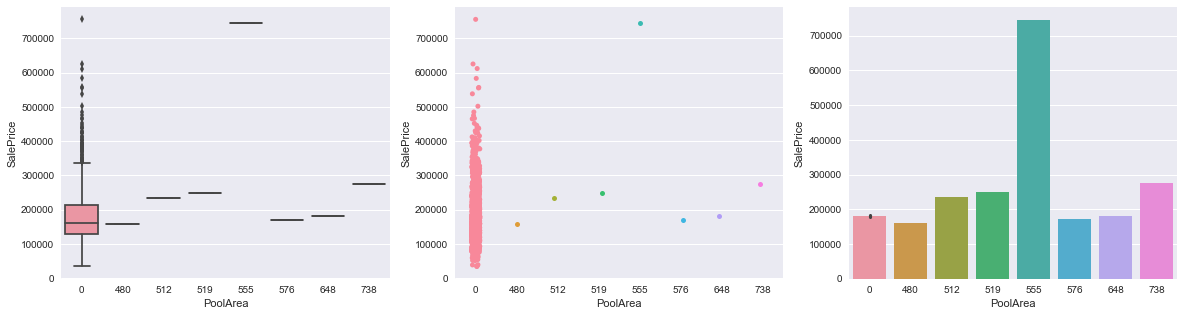

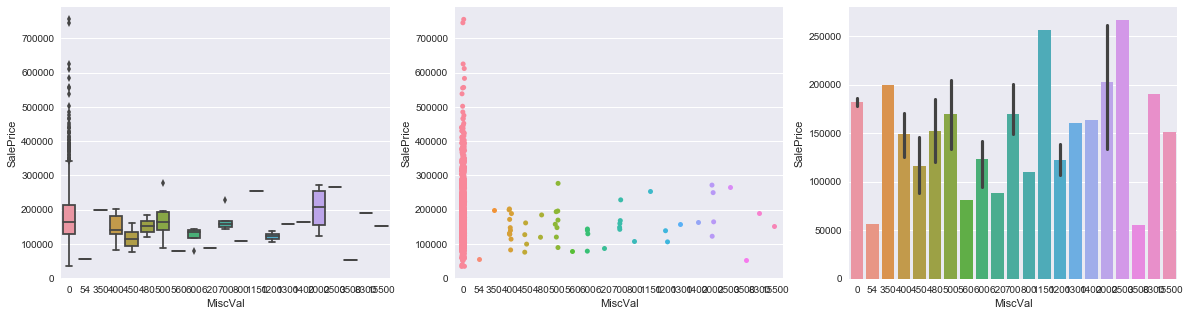

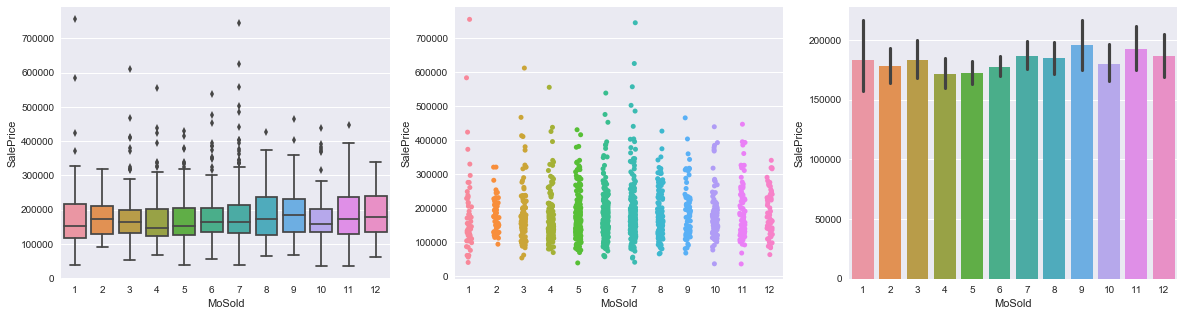

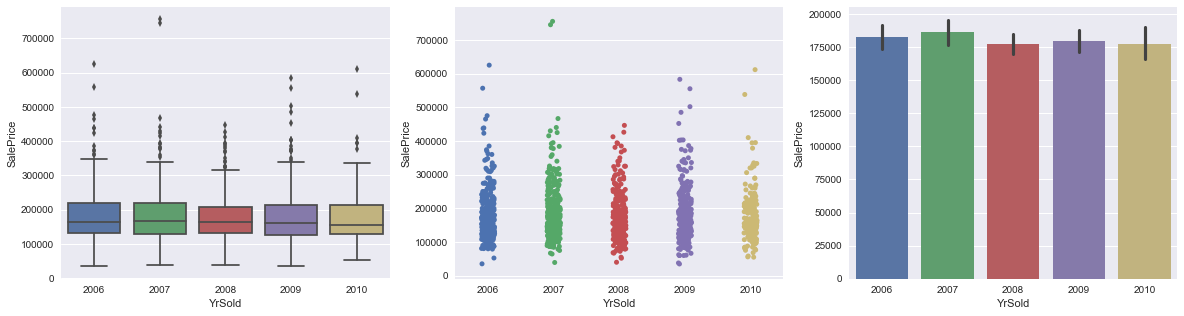

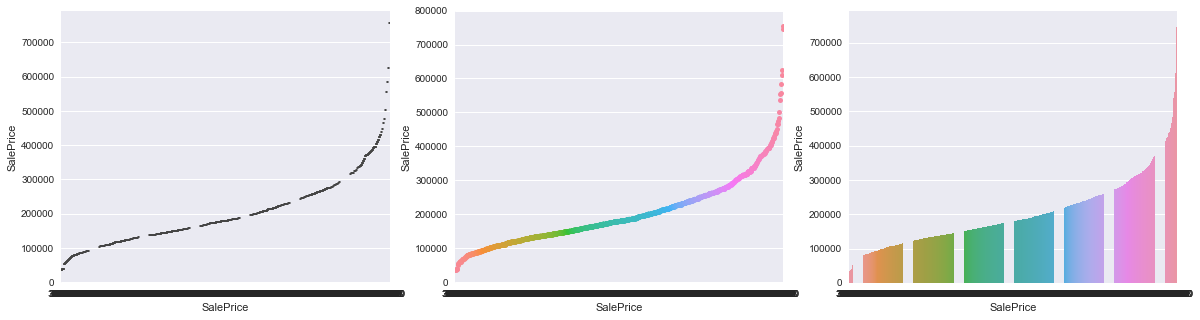

In [91]:
for col in numerical_col:
    plt.subplots(figsize =(20, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=col, y="SalePrice", data=train_df);
    plt.subplot(1, 3, 2)
    sns.stripplot(x=col, y="SalePrice", data=train_df, size = 5, jitter = True);
    plt.subplot(1, 3, 3)
    sns.barplot(x=col, y="SalePrice", data=train_df);

In [121]:
train_df[numerical_col].skew()


MSSubClass        1.407657
LotFrontage       2.165893
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64